![alt text](/home/yt/datascience/The-circumplex.ppm.png "circumplex")

# Prediction of Valence-Arousal and Fear Annotations using Audio and Visual Features

The Mediaeval 2017 Emotional Impact of Movies Task includes the data in the emotional domain 
(valence - arousal  regression) and  fear ( binary classification).
We have displayed the valence and arousal of all the movies in the dataset.
Also the time of the movie where fear is present is specified with the value of the second.
According to the Russell's circumplex model we were expectinf the "FEAR" to be appeared in the negative vallence, positive arousal part of the circumflex.
However in some movies, we can see that frightment exists in positive valence with negative arousal also.


In [1]:
import numpy as np
import pylab as pl
import re, fileinput
import os.path
import glob

import pandas as pd
from pandas import DataFrame, Series

import matplotlib.pyplot as plt
import matplotlib.colors as colors


import matplotlib
matplotlib.style.use('ggplot')

%matplotlib inline


In [2]:
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import svm
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
import scipy
from scipy.stats import pearsonr

In [3]:

# Input data
movieNames = ['After_The_Rain','Attitude_Matters','Barely_legal_stories','Between_Viewings','Big_Buck_Bunny','Chatter','Cloudland','Damaged_Kung_Fu','Decay','Elephant_s_Dream','First_Bite','Full_Service','Islands','Lesson_Learned','Norm','Nuclear_Family','On_time','Origami','Parafundit','Payload','Riding_The_Rails','Sintel','Spaceman','Superhero','Tears_of_Steel','The_room_of_franz_kafka','The_secret_number','To_Claire_From_Sonny','Wanted','You_Again']

pathcontinuous = "/home/yt/Desktop/cvpr2014/repro/mediaeval/data/dataset/ContinuousLIRIS-ACCEDE/"
continuousAnnotationsFolder = pathcontinuous +'continuous-annotations/'

med2017visualFeaturesfolder='/home/yt/Desktop/mediaeval2017/MEDIAEVAL17-DevSet-Visual_features/MEDIAEVAL17-DevSet-Visual_features/features/'
med2017audiofolder='/home/yt/Desktop/mediaeval2017/MEDIAEVAL17-DevSet-Audio_features/MEDIAEVAL17-DevSet-Audio_features/features/'
med2017annotationsFolder = '/home/yt/Desktop/mediaeval2017/MEDIAEVAL17-DevSet-Valence_Arousal-annotations/MEDIAEVAL17-DevSet-Valence_Arousal-annotations/annotations/'
med2017fearFolder = '/home/yt/Desktop/mediaeval2017/MEDIAEVAL17-DevSet-Fear-annotations/MEDIAEVAL17-DevSet-Fear-annotations/annotations/'



In [4]:
med2017visualFeaturesfolderTest='/home/yt/Desktop/mediaeval2017/MEDIAEVAL17-TestSet-Visual_features/MEDIAEVAL17-TestSet-Visual_features/visual_features/'
med2017audiofolderTest = '/home/yt/Desktop/mediaeval2017/MEDIAEVAL17-TestSet-Audio_features/MEDIAEVAL17-TestSet-Audio_features/audio_features/'
med2017datafolderTest = '/home/yt/Desktop/mediaeval2017/MEDIAEVAL17-TestSet-Data/MEDIAEVAL17-TestSet-Data/data/'


In [5]:
annotationfiles = glob.glob(med2017annotationsFolder+'*')
len(annotationfiles)

30

In [193]:
files = glob.glob(med2017datafolderTest+'*')
testmovienames =[ f.split('/')[-1].replace('.mp4','') for f in sorted(files) ]

In [8]:
#testmovienames

## Valence - Arosal Annotations
Thank you for downloading LIRIS-ACCEDE dataset.
This file contains valence/arousal annotations for the LIRIS-ACCEDE continuous part that is used for the first subtask of the MEDIAEVAL 2017 Emotional Impact of Movies task.
For each of the 30 movies, consecutive ten seconds-segments sliding over the whole movie with a shift of 5 seconds are considered and provided with valence and arousal annotations.
Each txt file contains 4 columns separated by tabulations. The first column is the segment id, starting from 0, the second column is the starting time of the segment in the movie and the third and fourth columns are respectively the valence and arousal values for this segment.

In [9]:
def getAnnotationDf(movname,folder):
    filename = os.path.join(folder, movname + '-MEDIAEVAL2017-valence_arousal.txt')
    annotation = np.genfromtxt(filename, names=True, delimiter='\t', dtype=None)
    df = pd.DataFrame(annotation)
    return df

In [10]:
def getAllAudioValenceDf():
    X = getAudioDf(movieNames[0])
    y = getAnnotationDf(movieNames[0],med2017annotationsFolder).MeanValence[:len(X)]

    for mov in movieNames[1:]:
        tX = getAudioDf(mov)
        ty = getAnnotationDf(mov,med2017annotationsFolder).MeanValence[:len(tX)]
        X  = X.append(tX)
        y  = y.append(ty)
        #if (tX.shape != ty.shape):
        #    print mov, tX.shape, ty.shape
    return X,y

In [11]:
def getAllAudioArousalDf():
    X = getAudioDf(movieNames[0])
    y = getAnnotationDf(movieNames[0],med2017annotationsFolder).MeanArousal[:len(X)]

    for mov in movieNames[1:]:
        tX = getAudioDf(mov)
        ty = getAnnotationDf(mov,med2017annotationsFolder).MeanArousal[:len(tX)]
        X  = X.append(tX)
        y  = y.append(ty)
        #if (tX.shape != ty.shape):
        #    print mov, tX.shape, ty.shape
    return X,y

In [12]:
df = getAnnotationDf('After_The_Rain',med2017annotationsFolder)

In [13]:
#df = getAnnotationDf('Decay',med2017annotationsFolder)

In [14]:
df.count()

Id             117
Time           117
MeanValence    117
MeanArousal    117
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe929a19890>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe926513250>]], dtype=object)

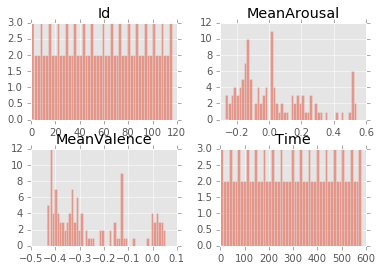

In [15]:
df.hist(alpha=0.5,bins=50)

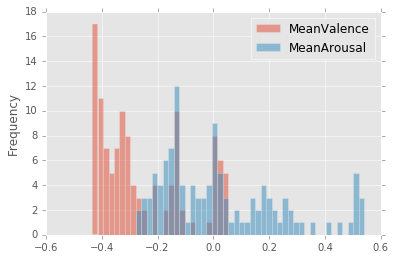

In [16]:
df[['MeanValence','MeanArousal']].plot.hist(alpha=0.5,bins=50)

In [17]:
df.shape

(117, 4)

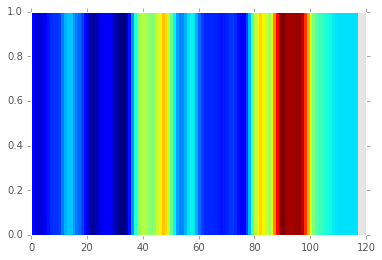

In [18]:
plt.pcolor(df[['MeanArousal']].transpose())

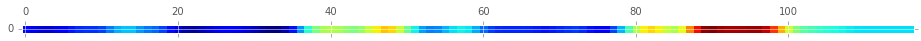

In [19]:
plt.matshow(df[['MeanArousal']].transpose())

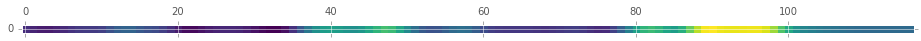

In [20]:
plt.matshow(df[['MeanArousal']].transpose(),cmap ='viridis')

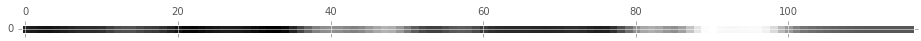

In [21]:
plt.matshow(df[['MeanArousal']].transpose(),cmap ='gray')

/home/yt/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


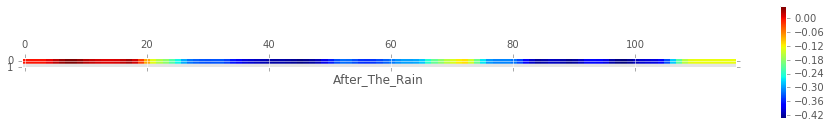

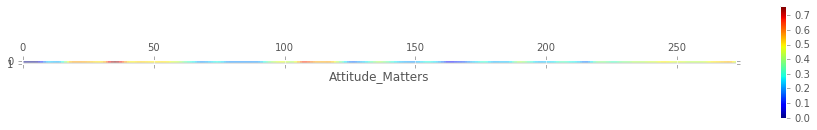

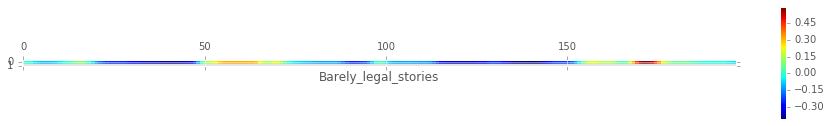

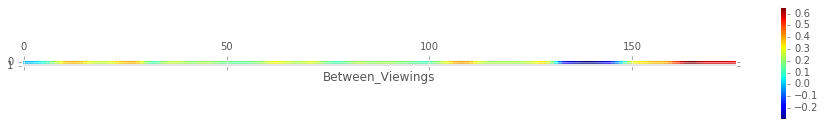

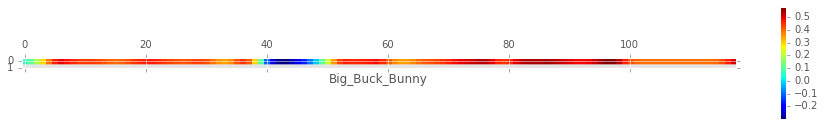

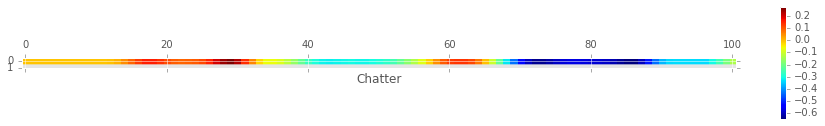

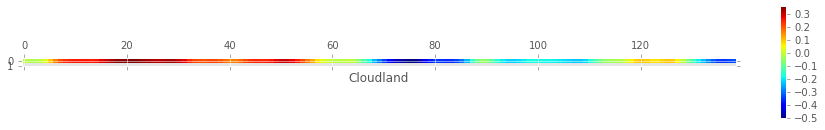

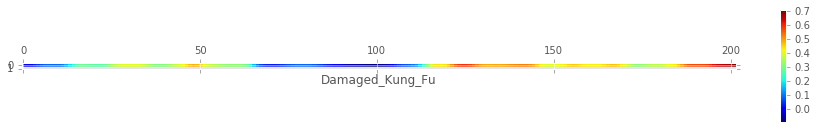

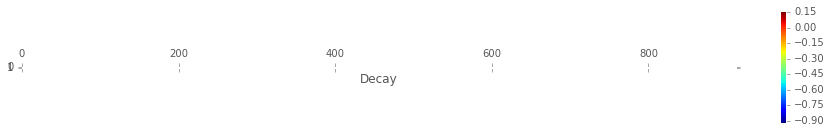

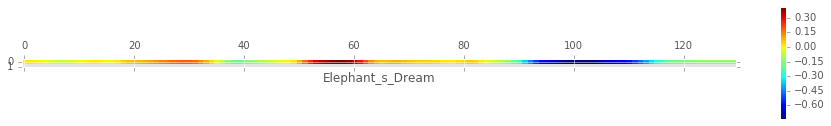

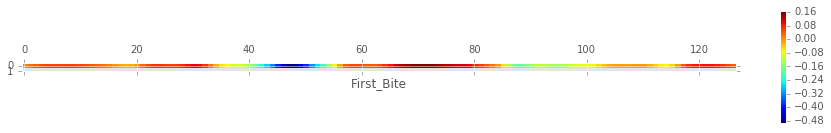

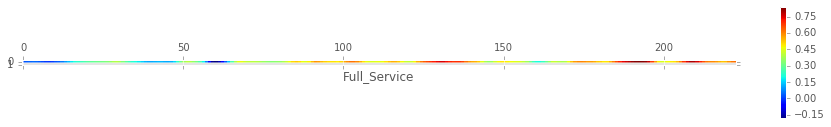

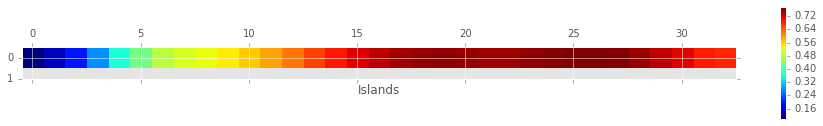

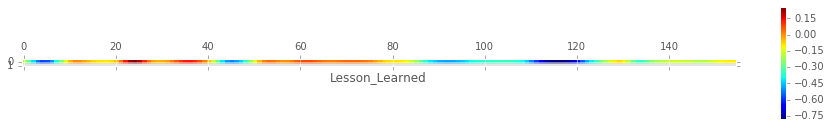

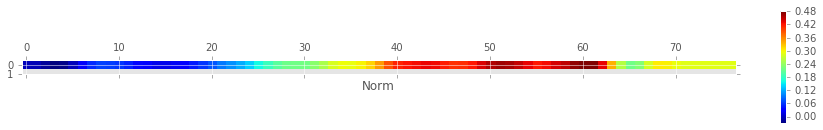

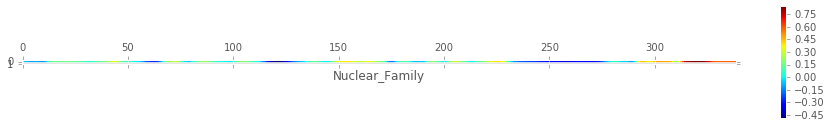

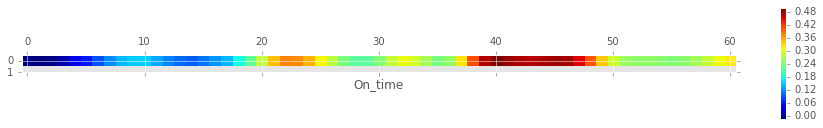

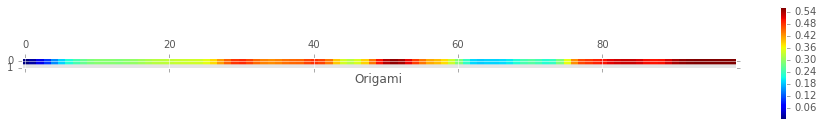

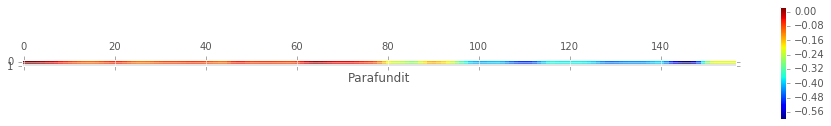

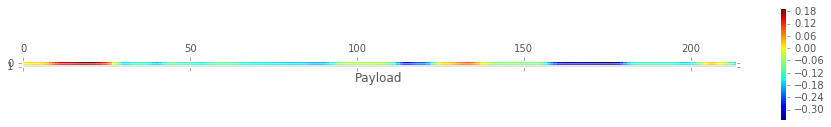

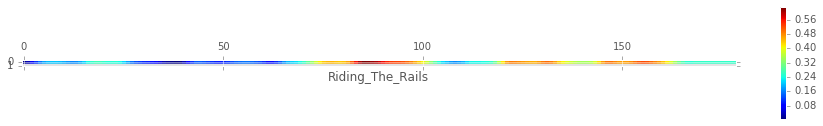

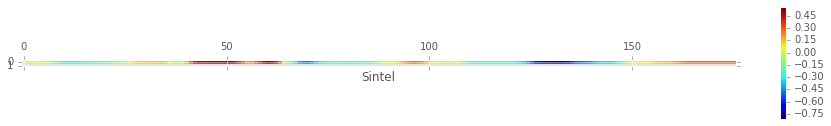

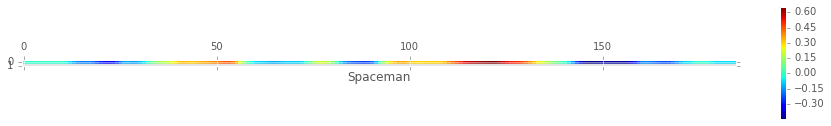

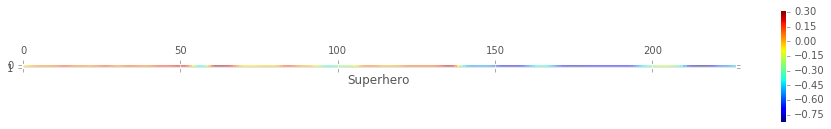

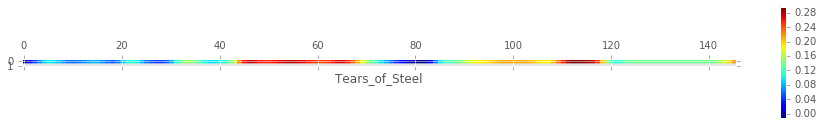

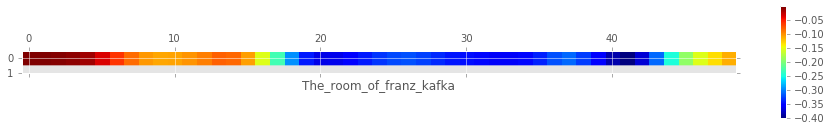

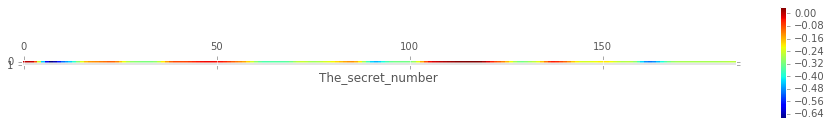

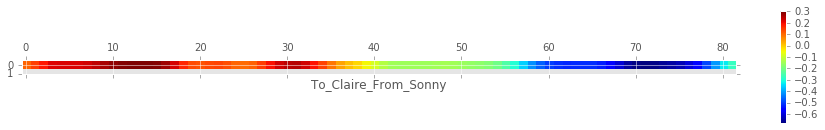

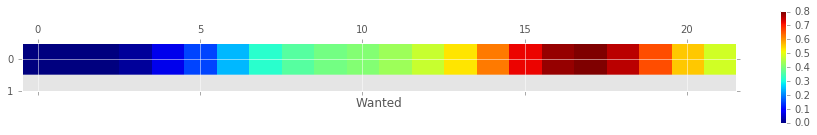

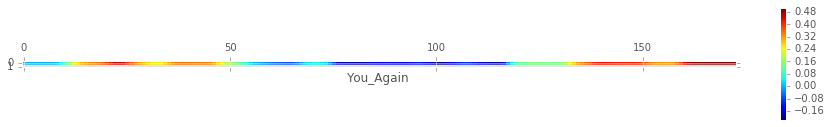

In [22]:
for f in movieNames:
    df = getAnnotationDf(f,med2017annotationsFolder)[['MeanValence']]
    plt.matshow(df.transpose())
    #plt.matshow(df.transpose(),cmap ='viridis')
    plt.yticks([0, 1], ["0", "1"])
    plt.colorbar()
    #plt.xticks(range(len(df)))
    plt.xlabel(f)

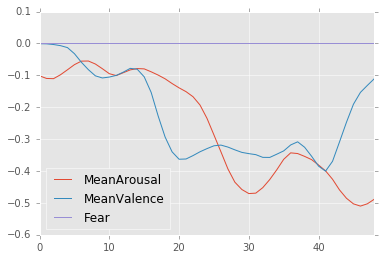

In [52]:
#mat= getAnnotationDf('Sintel',med2017annotationsFolder)[['MeanArousal']].transpose()
#mat.append(getAnnotationDf('Sintel',med2017annotationsFolder)[['MeanValence']].transpose())
#mat.as_matrix()
f= 'The_room_of_franz_kafka'
df = getAnnotationDf(f,med2017annotationsFolder)[['MeanArousal','MeanValence']]
df = pd.concat( [df, getFearDf(f)[['Fear']]], axis=1 )
df.plot()

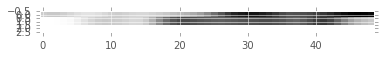

In [97]:
T = df.transpose().as_matrix()
plt.imshow(T, interpolation='nearest',cmap='gray')

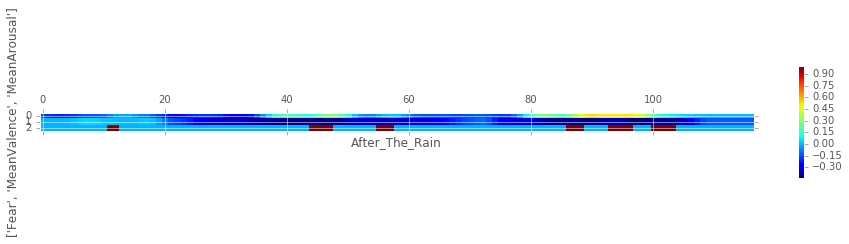

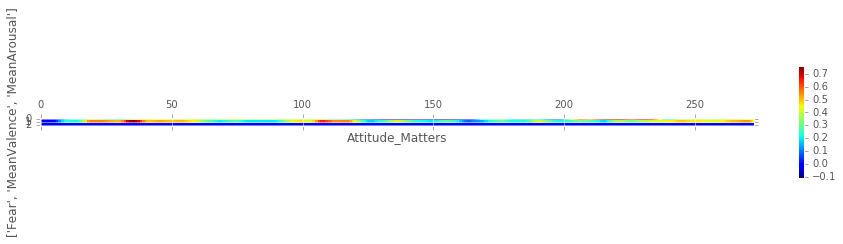

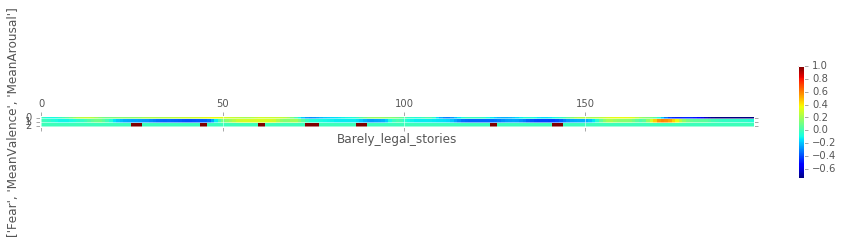

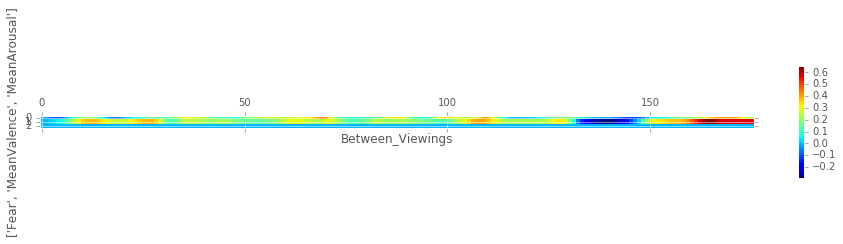

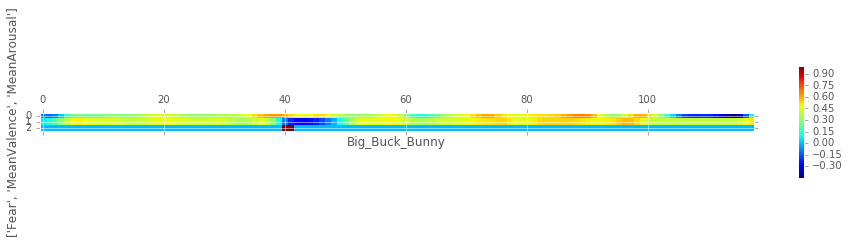

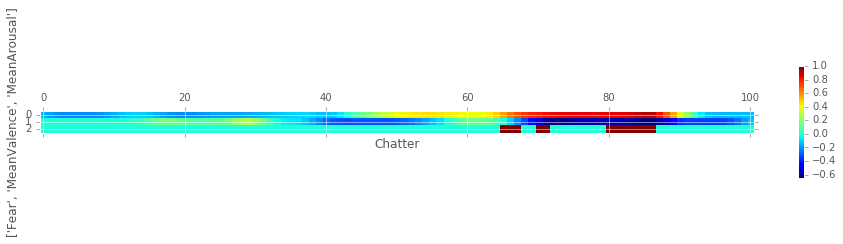

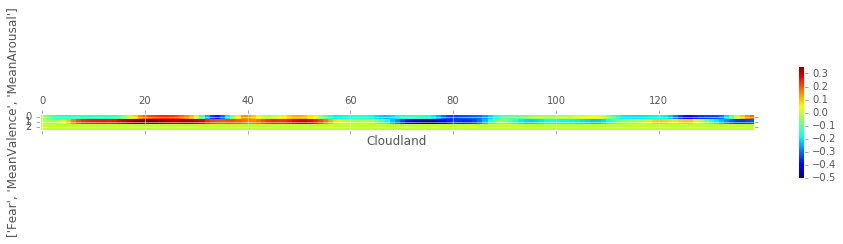

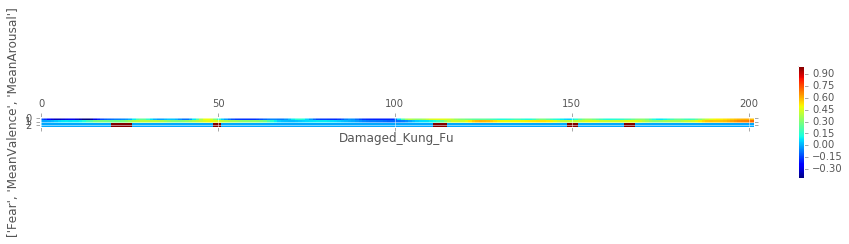

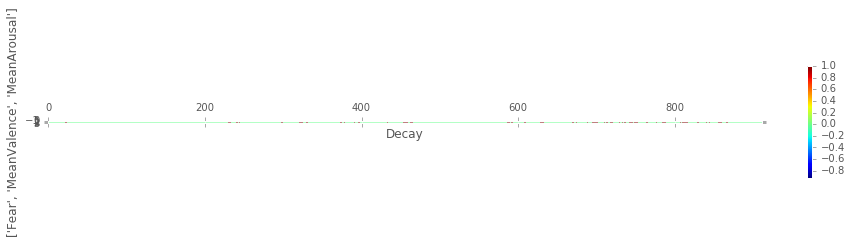

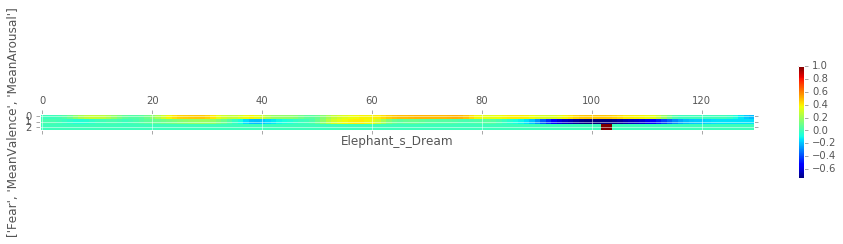

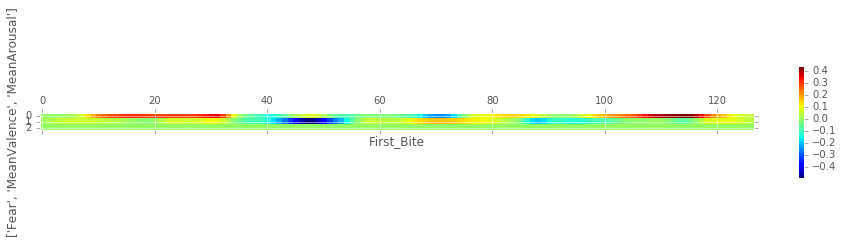

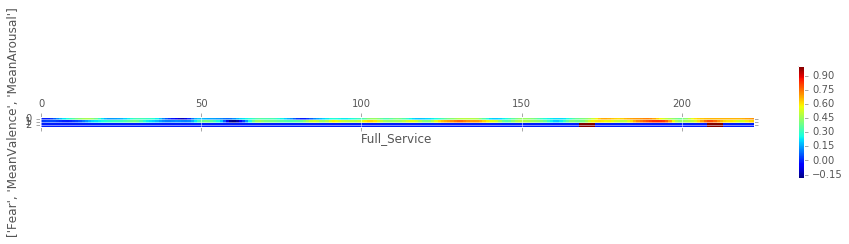

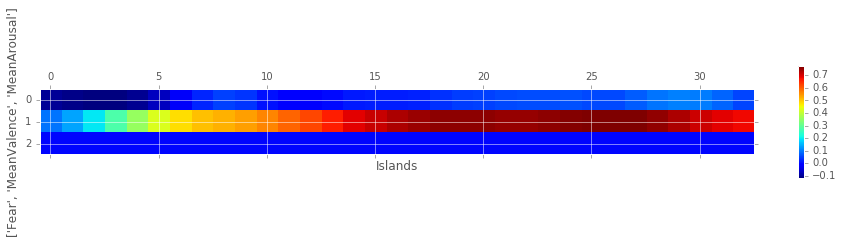

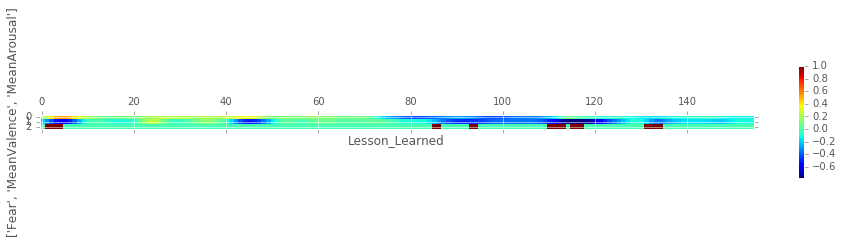

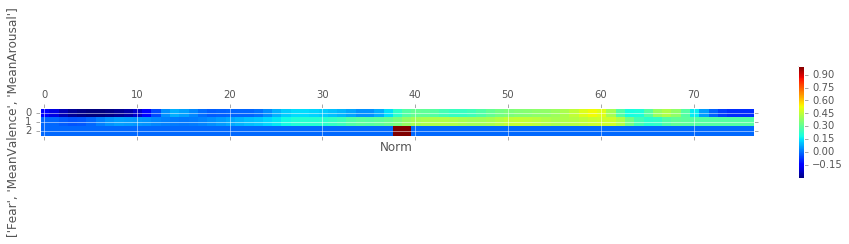

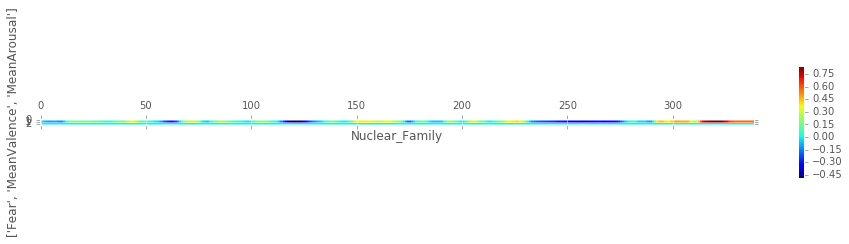

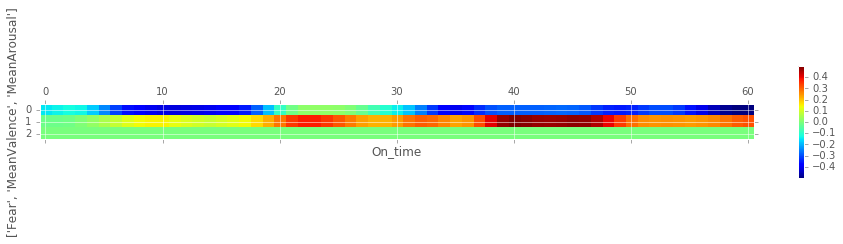

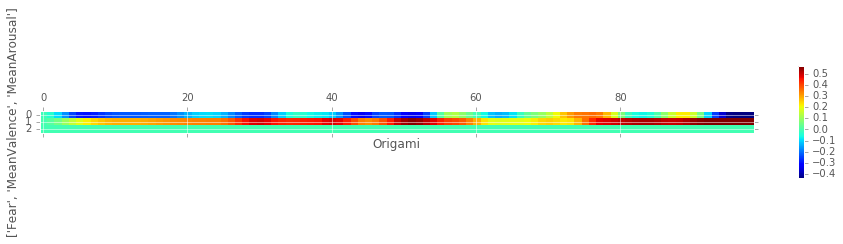

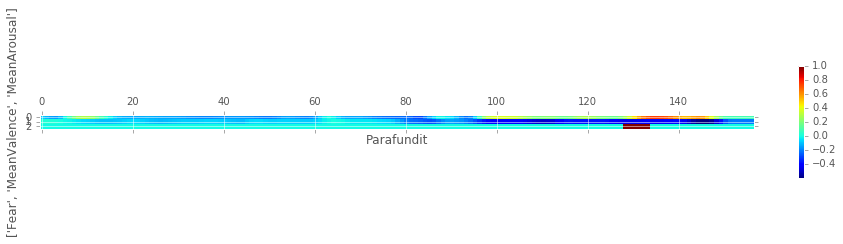

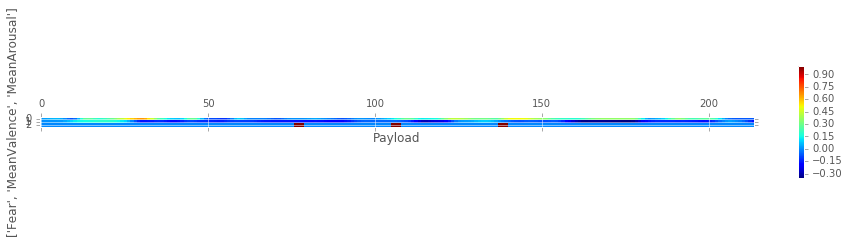

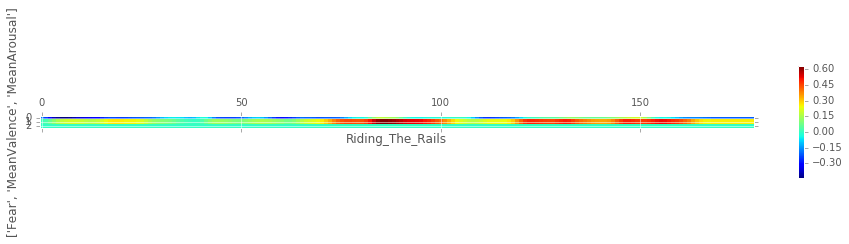

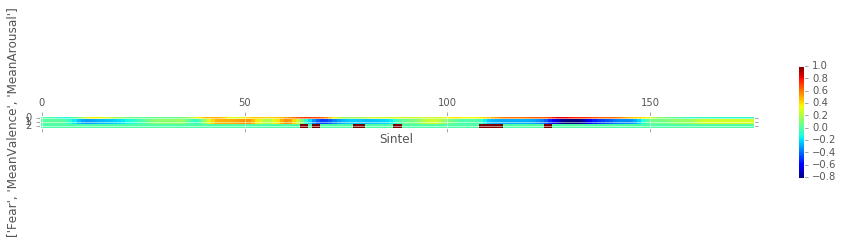

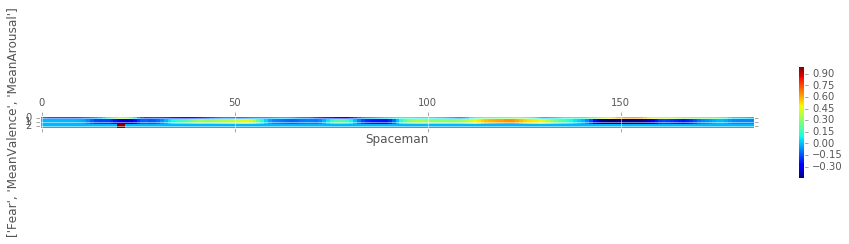

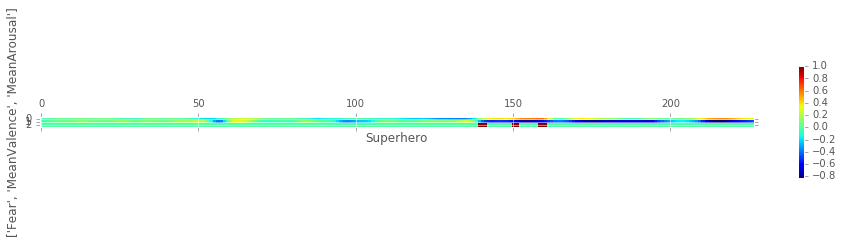

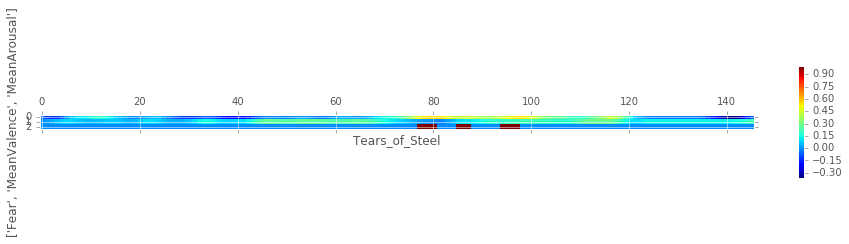

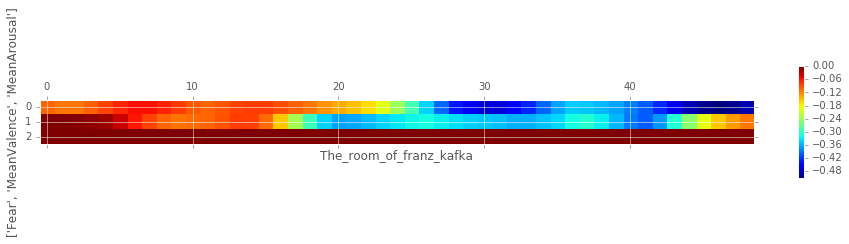

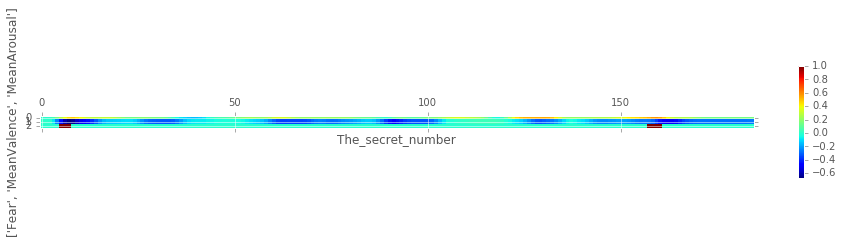

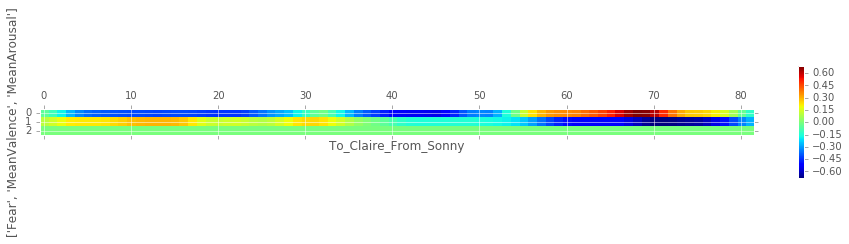

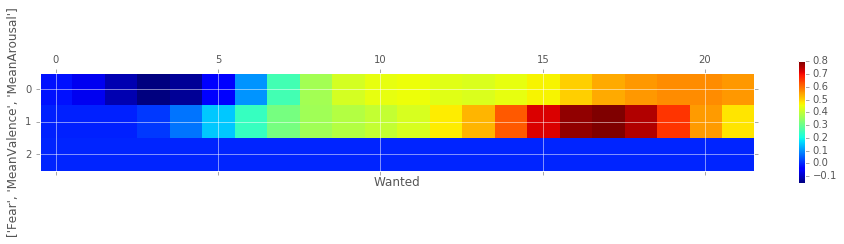

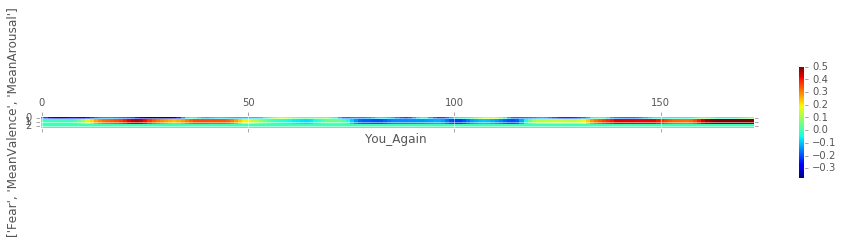

In [47]:

for f in movieNames:
    df = getAnnotationDf(f,med2017annotationsFolder)[['MeanArousal','MeanValence']]
    df = pd.concat( [df, getFearDf(f)[['Fear']]], axis=1 )
    plt.matshow(df.transpose().as_matrix())
    #T = df.transpose().as_matrix()
    #plt.imshow(T,cmap='gray_r')
    #plt.imshow(T/np.sum(T,axis=0), interpolation='nearest', vmin=0,cmap='gray_r')

    plt.xlabel(f)
    plt.ylabel(['Fear','MeanValence','MeanArousal'])
    plt.colorbar()

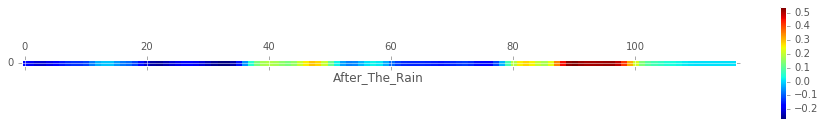

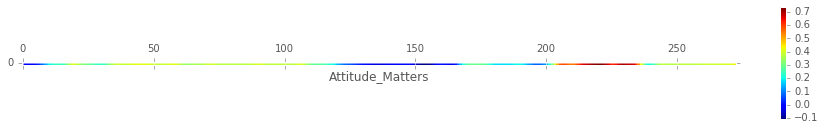

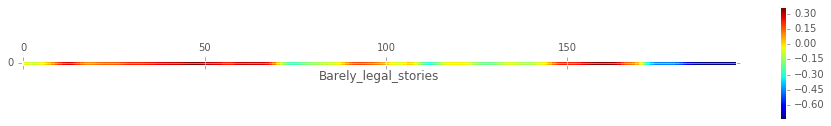

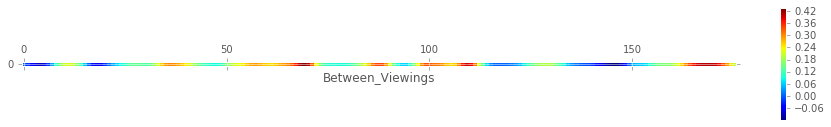

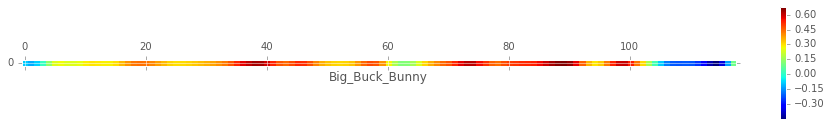

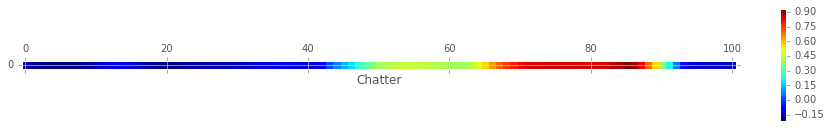

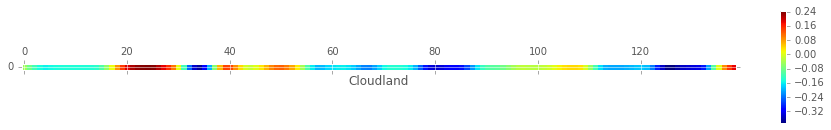

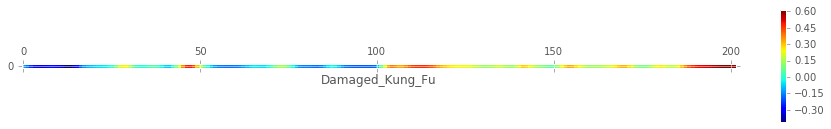

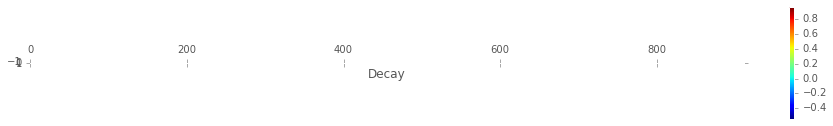

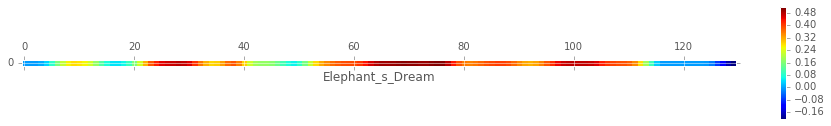

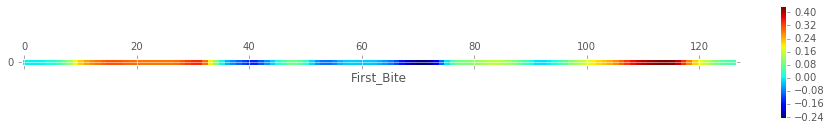

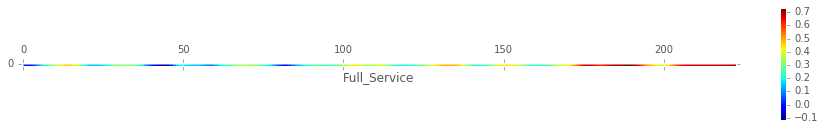

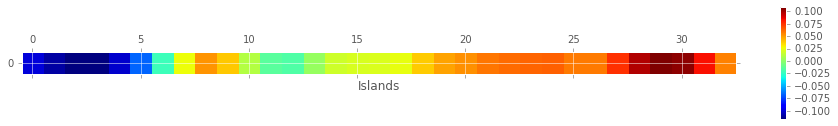

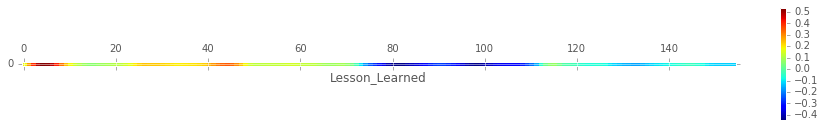

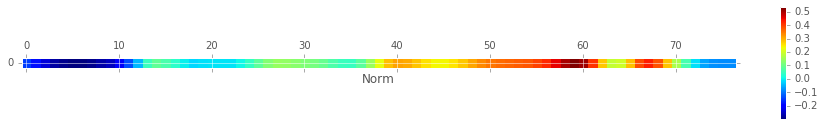

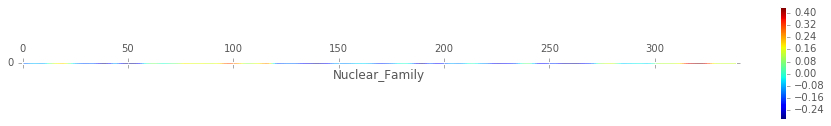

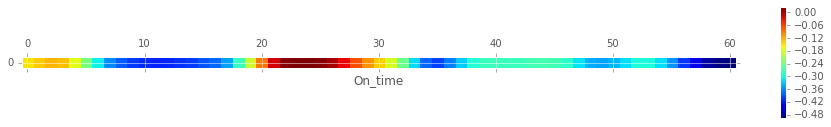

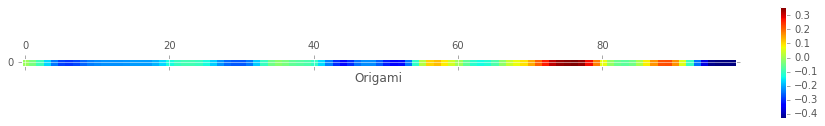

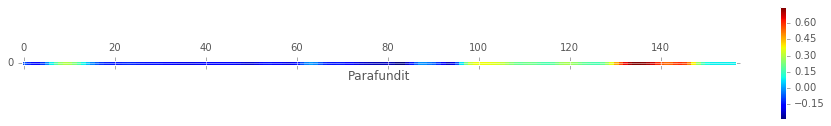

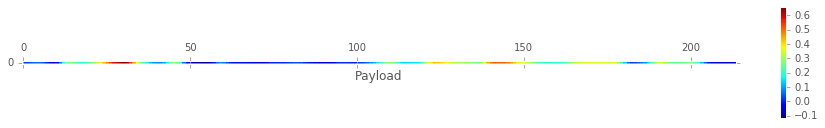

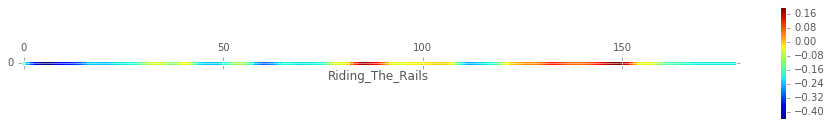

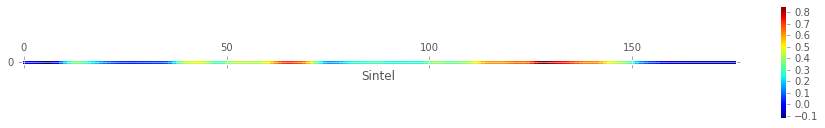

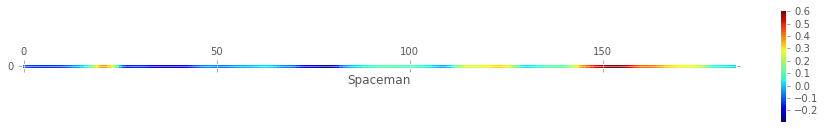

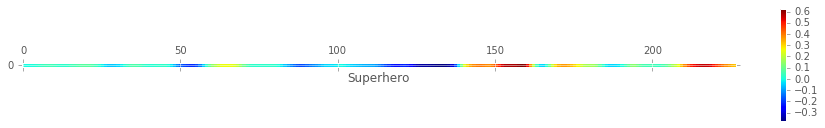

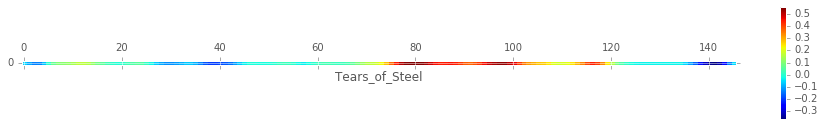

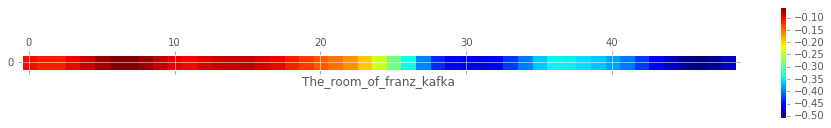

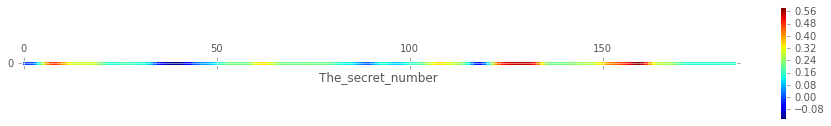

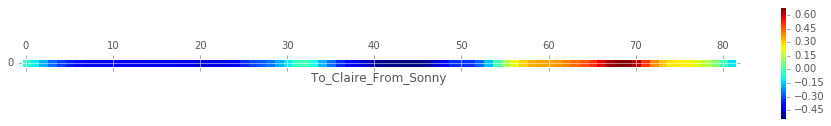

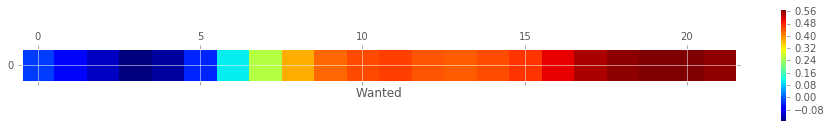

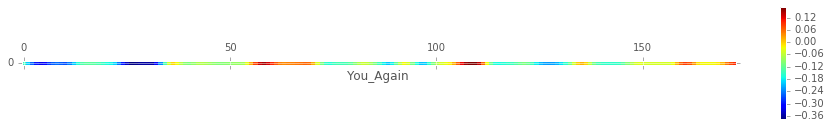

In [23]:
for f in movieNames:
    plt.matshow(getAnnotationDf(f,med2017annotationsFolder)[['MeanArousal']].transpose())
    plt.xlabel(f)
    plt.colorbar()

In [ ]:
df[['MeanValence','MeanArousal']].plot()

In [ ]:
df = getAnnotationDf('After_The_Rain',med2017annotationsFolder)
plt.matshow(df[['MeanValence']].transpose())

In [ ]:
getAnnotationDf('Attitude_Matters',med2017annotationsFolder)[['MeanValence','MeanArousal']].hist()

In [ ]:
getAnnotationDf('After_The_Rain',med2017annotationsFolder)[['MeanValence','MeanArousal']].hist(bins=50)

## Fear Annotations
Thank you for downloading LIRIS-ACCEDE dataset.
This file contains fear annotations for the LIRIS-ACCEDE continuous part that is used for the second subtask of the MEDIAEVAL 2017 Emotional Impact of Movies task.
For each of the 30 movies, consecutive ten seconds-segments sliding over the whole movie with a shift of 5 seconds are considered and provided with fear annotations.
Each txt file contains 3 columns separated by tabulations. The first column is the segment id, starting from 0, the second column is the starting time of the segment in the movie and the third column indicates whether this segment induces fear (value: 1) or not (value: 0).

In [35]:
def getFearDfold(movname,folder):
    filename = os.path.join(folder, movname + '-MEDIAEVAL2017-fear.txt')
    annotation = np.genfromtxt(filename, names=True, delimiter='\t', dtype=None)
    df = pd.DataFrame(annotation)
    return df

def getFearDf(movname):
    filename = os.path.join(med2017fearFolder, movname + '-MEDIAEVAL2017-fear.txt')
    annotation = np.genfromtxt(filename, names=True, delimiter='\t', dtype=None)
    df = pd.DataFrame(annotation)
    return df


In [75]:
groups = {
    0:['Decay'],
    1:['You_Again','Damaged_Kung_Fu','The_secret_number','Spaceman'],
    2:['Cloudland','Origami','Riding_The_Rails','Tears_of_Steel','Sintel'],
    3:['On_time','Elephant_s_Dream','Norm','Big_Buck_Bunny','Chatter','Full_Service'],
    4:['Islands','To_Claire_From_Sonny','Nuclear_Family','After_The_Rain','Parafundit'],
    5:['The_room_of_franz_kafka','Attitude_Matters','Lesson_Learned','Superhero'],
    6:['First_Bite','Wanted','Between_Viewings','Barely_legal_stories','Payload']
}

In [86]:
def gettraintestmovielist(groupno):
    testlist = groups[groupno]
    trainlist =[]
    for idx, group in enumerate(groups):
        if idx != groupno:
            for g in groups[idx]:
                trainlist.append(g)
    return trainlist, testlist

In [87]:
Xtrain, Xtest=gettraintestmovielist(1)  # index 1 olanları test , diğerlerini train yapan fonksiyon

In [90]:
#Xtrain, Xtest

In [98]:
s = 0
for g in groups:
    l = len(groups[g])
#    print(l)
#    print(groups[g])
    s += l
#print "Sum:", s

In [99]:
def divideFearMovies(movieNames):
    flist=[]
    noflist=[]
    feardurationdict = {}
    nofeardurationdict = {}
    for moviename in movieNames:   
        df = getAnnotationDf(moviename,med2017annotationsFolder)
        feardf = getFearDf(moviename)
        
        fearlist = list(feardf[ feardf.Fear > 0 ]['Time'])
        if len(fearlist):
            flist.append( moviename)
            feardurationdict[moviename] = [len(feardf),len(fearlist)]
        else:
            noflist.append(moviename)
            nofeardurationdict[moviename] = [len(feardf),len(fearlist)]
    return  feardurationdict, nofeardurationdict

In [100]:
fearmovies , nofearmovies = divideFearMovies(movieNames)
divideFearMovies(movieNames)

({'After_The_Rain': [117, 20],
  'Barely_legal_stories': [197, 19],
  'Big_Buck_Bunny': [118, 2],
  'Chatter': [101, 12],
  'Damaged_Kung_Fu': [202, 18],
  'Decay': [912, 119],
  'Elephant_s_Dream': [130, 2],
  'Full_Service': [223, 10],
  'Lesson_Learned': [155, 19],
  'Norm': [77, 2],
  'Parafundit': [157, 6],
  'Payload': [214, 9],
  'Sintel': [176, 17],
  'Spaceman': [185, 2],
  'Superhero': [227, 8],
  'Tears_of_Steel': [146, 11],
  'The_secret_number': [185, 7]},
 {'Attitude_Matters': [273, 0],
  'Between_Viewings': [176, 0],
  'Cloudland': [139, 0],
  'First_Bite': [127, 0],
  'Islands': [33, 0],
  'Nuclear_Family': [339, 0],
  'On_time': [61, 0],
  'Origami': [99, 0],
  'Riding_The_Rails': [179, 0],
  'The_room_of_franz_kafka': [49, 0],
  'To_Claire_From_Sonny': [82, 0],
  'Wanted': [22, 0],
  'You_Again': [173, 0]})

In [101]:
len(fearmovies),len(nofearmovies)

(17, 13)

In [102]:
for f in fearmovies:
    print f, fearmovies[f][1]*1.0/fearmovies[f][0]

After_The_Rain 0.17094017094
Barely_legal_stories 0.0964467005076
Superhero 0.0352422907489
Spaceman 0.0108108108108
Decay 0.13048245614
Elephant_s_Dream 0.0153846153846
Big_Buck_Bunny 0.0169491525424
Damaged_Kung_Fu 0.0891089108911
Sintel 0.0965909090909
Lesson_Learned 0.122580645161
The_secret_number 0.0378378378378
Tears_of_Steel 0.0753424657534
Parafundit 0.0382165605096
Full_Service 0.0448430493274
Chatter 0.118811881188
Payload 0.0420560747664
Norm 0.025974025974


([], <a list of 0 Text yticklabel objects>)

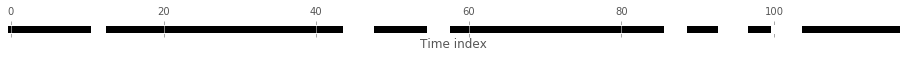

In [103]:
df = getFearDf('After_The_Rain')
#getFearDf('After_The_Rain').head()
#getFearDf('After_The_Rain',med2017fearFolder).shape
plt.matshow(df[['Fear']].transpose(), cmap='gray')
plt.xlabel("Time index")
plt.yticks(())

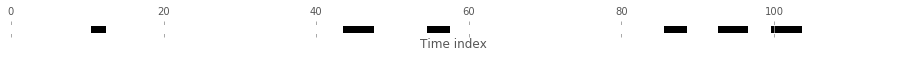

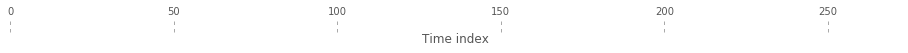

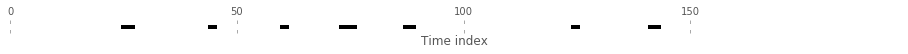

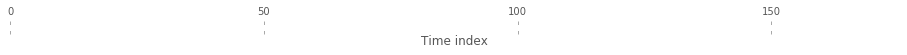

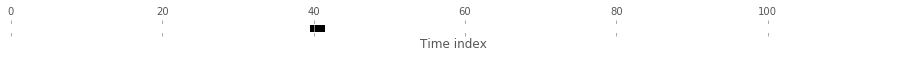

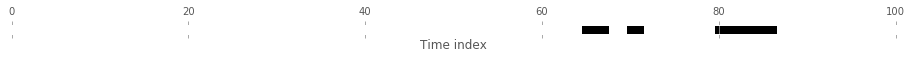

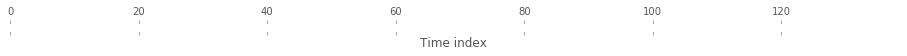

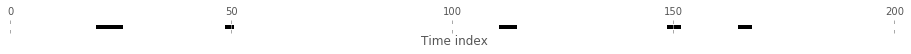

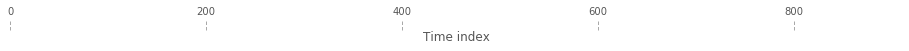

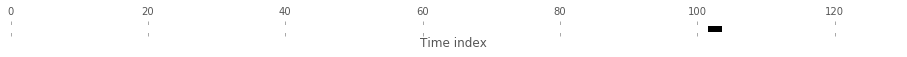

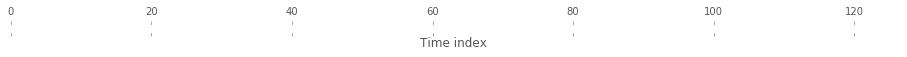

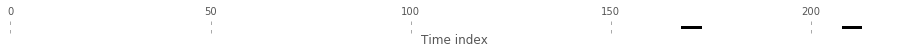

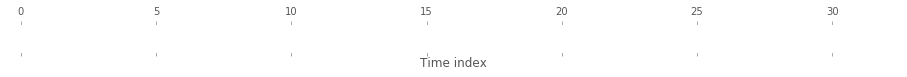

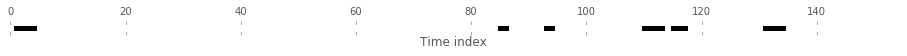

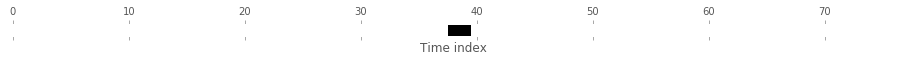

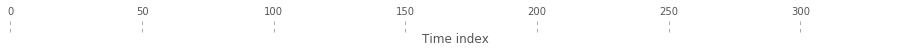

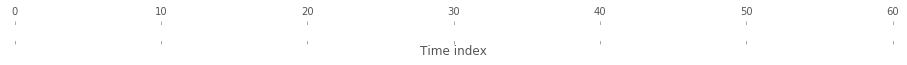

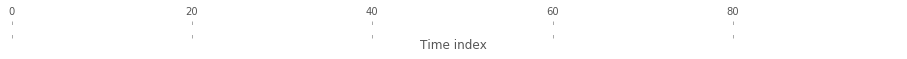

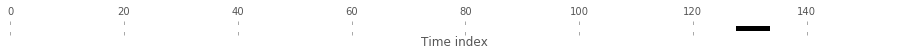

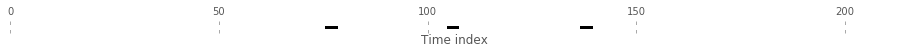

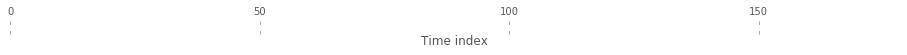

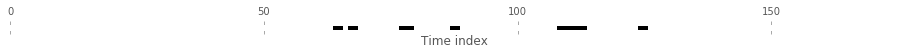

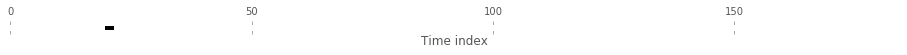

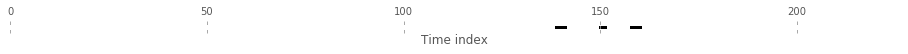

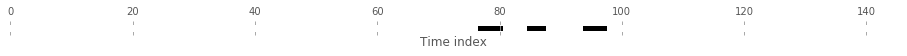

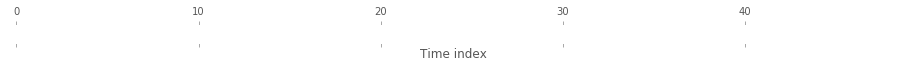

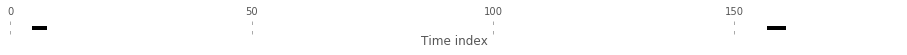

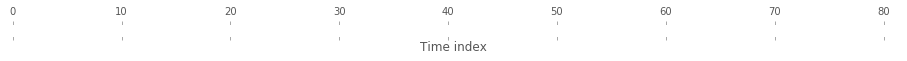

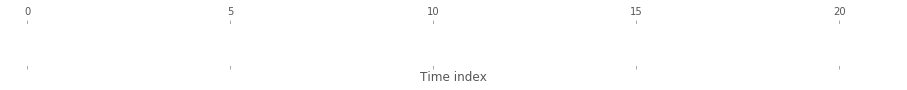

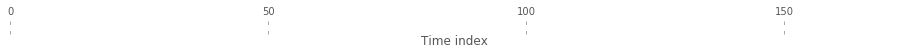

In [104]:
plt.figure()
for f in movieNames:
    df = getFearDf(f)
    plt.matshow(df[['Fear']].transpose(), cmap='gray_r')
    plt.xlabel("Time index")
    plt.yticks(())

## Normalization Functions

In [105]:
# get stardardize mean=0, std=1 scaled
# return type numpy.ndarray
def getStd(df):
    std_scaler = preprocessing.StandardScaler()
    return std_scaler.fit_transform(df)

#get the values scaled btw (0,1)
# return type numpy.ndarray
def getNormalized(df):
    min_max_scaler = preprocessing.MinMaxScaler()
    return min_max_scaler.fit_transform(df)

# get stardardize mean=0, std=1 scaled
# return type dataframe
def getStd2(df):
    return ((df - df.mean()) / df.std())

#get the values scaled btw (0,1)
# return type dataframe
def getNormalized2(df):
    return ((df-df.min()) / (df.max()-df.min()))


## Mediaeval 2016 arousal valence annotations

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe923ddf410>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe9234b4090>]], dtype=object)

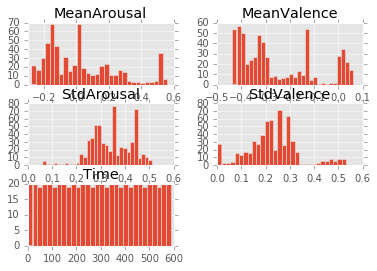

In [106]:
def getDf(movname):
    arousalfilename = os.path.join(continuousAnnotationsFolder, movname + '_Arousal.txt')
    valencefilename = os.path.join(continuousAnnotationsFolder, movname + '_Valence.txt')
    
    movArousal = np.genfromtxt(arousalfilename, names=True, delimiter='\t', dtype=None)
    movValence = np.genfromtxt(valencefilename, names=True, delimiter='\t', dtype=None)
    
    ardf = pd.DataFrame(movArousal)
    valdf = pd.DataFrame(movValence) 

    return ardf, valdf

def getAnnotationDf2016(movname):
    ar , val = getDf(movname)
    ar.set_index('Time', inplace=True)
    val.set_index('Time', inplace=True)
    ar.rename(columns={'Mean':'MeanArousal','Std':'StdArousal'}, inplace=True)
    val.rename(columns={'Mean':'MeanValence','Std':'StdValence'}, inplace=True)
    p = pd.concat([val,ar], axis=1)
    p.reset_index(inplace=True)
    return p

getAnnotationDf2016('After_The_Rain').hist(bins=30)

In [107]:
ar , val = getDf('After_The_Rain')
x = pd.DataFrame([val.Mean,ar.Mean])
ar.set_index('Time', inplace=True)
val.set_index('Time', inplace=True)
ar.rename(columns={'Mean':'MeanArousal','Std':'StdArousal'}, inplace=True)
val.rename(columns={'Mean':'MeanValence','Std':'StdValence'}, inplace=True)
p = pd.concat([val,ar], axis=1)
p.reset_index(inplace=True)
p.shape
#p.head()

#val.head(), ar.head()
#pd.concat([val,ar], axis=1).head()

#pw = p.rolling(10,win_type='boxcar').mean()
#p16 = pw[10::5]
#p16.shape
#p16.describe()
#pw[10::5].describe()
#pw[10::5].MeanArousal.plot()
#p16.MeanArousal.plot()
#p16.head(10)

(590, 5)

In [108]:
ar16 , val16 = getDf('After_The_Rain')
#ar.describe(), val.describe()
annot17 = getAnnotationDf('After_The_Rain',med2017annotationsFolder)
#annot17.describe()
#annot7.head(10)
#annot17.shape

In [109]:
annot17.shape, ar16.shape

((117, 4), (590, 3))

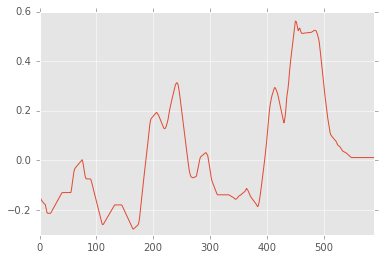

In [110]:
ar16.Mean.plot()

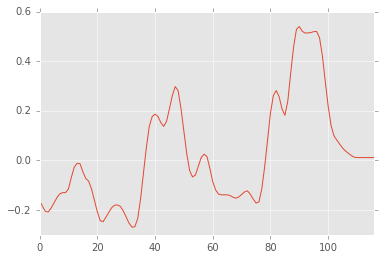

In [111]:
annot17.MeanArousal.plot()

## Audio features
The mediaeval 2017 dataset includes some audio features generated wit OpenSmile tool. Number features are 1583, for all the movies in the dataset , features are avaliable as a 10 sec window, inteleaved with 5 seconds.

Thank you for downloading LIRIS-ACCEDE dataset.
This file contains audio features for the LIRIS-ACCEDE continuous part that is used for the MEDIAEVAL 2017 Emotional Impact of Movies task.
For each of the 30 movies, consecutive ten seconds-segments sliding over the whole movie with a shift of 5 seconds are considered. Each segment has its csv file whose name indicates the movie and the identifier of the segment, starting from 0. This id corresponds to the one used for the segment annotations provided in files "MEDIAEVAL17-DevSet-Valence_Arousal-annotations.zip" and "MEDIAEVAL17-DevSet-Fear-annotations.zip".

The audio features have been extracted using openSmile toolbox (http://audeering.com/technology/opensmile/) [1]. The default configuration "emobase2010.conf" was used. It allows the computation of 1 582 features which result from a base of 34 low-level descriptors (LLD) with 34 corresponding delta coefficients appended, and 21 functionals applied to each of these 68 LLD contours (1 428 features).
In addition, 19 functionals are applied to the 4 pitch-based LLD and their four delta coefficient contours (152 features). Finally the number of pitch onsets (pseudo syllables) and the total duration of the input are appended (2 features).
Details can be found in openSmile book (http://www.audeering.com/research-and-open-source/files/openSMILE-book-latest.pdf).

[1] Florian Eyben, Felix Weninger, Florian Gross, Björn Schuller: "Recent Developments in openSMILE, the Munich Open-Source Multimedia Feature Extractor", In Proc. ACM Multimedia (MM), Barcelona, Spain, ACM, ISBN 978-1-4503-2404-5, pp. 835-838, October 2013. doi:10.1145/2502081.2502224

In [112]:
def getAudioDf(moviename):
    files = glob.glob(med2017audiofolder+moviename+'/*.csv')
    files = sorted(files)
    alist = []
    for fname in files:
        f=open(fname,'r')
        head = []
        for l in f :
            if '@attribute' in l:
                head.append(l.split()[1])
            elif l == '\n':
                l
            elif l[0] =='@':
                l
            else:
                alist.append(map(float,l.split(',')[1:])) #first attribute is string ,skipped
        f.close()
    
    return pd.DataFrame(alist,columns=head[1:])

In [113]:
def getAllAudioDf():
    X = getAudioDf(movieNames[0])

    for mov in movieNames[1:]:
        tX=getAudioDf(mov)
        X = X.append(tX)
    return X

def getMovieListAudioDf(movieNames):
    X = getAudioDf(movieNames[0])
    for mov in movieNames[1:]:
        tX=getAudioDf(mov)
        X = X.append(tX)
    return X

def getAllAudioFearDf():
    X = getAudioDf(movieNames[0])
    y = getFearDf(movieNames[0]).Fear[:len(X)]

    for mov in movieNames[1:]:
        tX=getAudioDf(mov)
        ty=getFearDf(mov).Fear[:len(tX)]
        X = X.append(tX)
        y = y.append(ty)
        #if (X.shape != y.shape):
        #    print mov, X.shape, y.shape
    return X,y

def getMovieListAudioFearDf(movieNames):
    X = getAudioDf(movieNames[0])
    y = getFearDf(movieNames[0]).Fear[:len(X)]

    for mov in movieNames[1:]:
        tX=getAudioDf(mov)
        ty=getFearDf(mov).Fear[:len(tX)]
        X = X.append(tX)
        y = y.append(ty)
        #if (X.shape != y.shape):
        #    print mov, X.shape, y.shape
    return X,y

In [114]:
X,y = getAllAudioFearDf()
y.shape, X.shape
y[y == 1].count()*1.0 / y.count()
y[y == 0].count()*1.0 / y.count()


0.94623860182370823

In [119]:
y.value_counts()

0    4981
1     283
Name: Fear, dtype: int64

In [118]:
movielisttrain, movielisttest=gettraintestmovielist(1)
Xtrain, ytrain = getMovieListAudioFearDf(movielisttrain)
Xtest, ytest = getMovieListAudioFearDf(movielisttest)

In [122]:
ytrain.value_counts(), ytest.value_counts()

(0    4265
 1     256
 Name: Fear, dtype: int64, 0    716
 1     27
 Name: Fear, dtype: int64)

## Visual Features
Thank you for downloading LIRIS-ACCEDE dataset.
This file contains visual features for the LIRIS-ACCEDE continuous part that is used for the MEDIAEVAL 2017 Emotional Impact of Movies task.
For each of the 30 movies, one frame per second is extracted using the following ffmpeg command: "ffmpeg -loglevel error -i movie.mp4 -r 1 -f image2 frame-%05d.jpg".

For each of these images, several general purpose visual features are provided. They have been extracted using LIRE library (http://www.lire-project.net/), except CNN features (vgg16 fc6 layer output) that have been extracted using Matlab Neural Networks toolbox.

- Auto Color Correlogram (acc)

- Color and Edge Directivity Descriptor (cedd)

- Color Layout (cl)

- Edge Histogram (eh)

- Fuzzy Color and Texture Histogram (fcth)

- Gabor (gabor)

- Joint descriptor joining CEDD and FCTH in one histogram (jcd)

- Scalable Color (sc)

- Tamura (tamura)

- Local Binary Patterns (lbp) 

- VGG16 fc6 layer output (fc6)

Features are stored in text files, one file by image and by feature type. For example, "After_The_Rain-00001_acc.txt" contains Auto Color Correlogram features (acc) for the 1st frame of After_The_Rain movie. Each feature file contains one line where feature values are separated by commas.

In [123]:

def getACCDf(moviename):
    files = glob.glob(med2017visualFeaturesfolder+moviename+'/acc/*.txt')
    files = sorted(files)
    alist = []
    for fname in files:
        f=open(fname,'r')
        for l in f:
            alist.append(map(float,l.split(',')))
        f.close()
    return pd.DataFrame(alist)

def getVisFeatureDf(moviename,typename):
    files = glob.glob(med2017visualFeaturesfolder+moviename+'/'+typename+'/*.txt')
    files = sorted(files)
    alist = []
    for fname in files:
        f=open(fname,'r')
        for l in f:
            alist.append(map(float,l.split(',')))
        f.close()
    return pd.DataFrame(alist)

def getAvgVisFeatureDf(moviename,typename):
    df = getVisFeatureDf(moviename,typename)
    dfwindow = df.rolling(10).mean()[10::5]
    dfwindow.reset_index(inplace=True)
    dfwindow.drop('index',axis=1,inplace=True)
    return dfwindow

def getAvgVisFeatListDf(moviename,featlist):
    
    df = getVisFeatureDf(moviename,featlist[0])
    for feat in featlist[1:]:
        tdf = getVisFeatureDf(moviename,feat)
        df = pd.concat([df,tdf],axis=1)
    
    dfwindow = df.rolling(10).mean()[10::5]
    dfwindow.reset_index(inplace=True)
    dfwindow.drop('index',axis=1,inplace=True)
    return dfwindow

visual_feat = ['acc', 'cedd', 'cl', 'eh', 'fc6', 'fcth', 'gabor', 'jcd', 'lbp', 'sc', 'tamura'   ]

In [124]:
def getAllVisArousalDf(featname):
    X = getAvgVisFeatureDf(movieNames[0],featname)
    y = getAnnotationDf(movieNames[0],med2017annotationsFolder).MeanArousal[:len(X)]

    for mov in movieNames[1:]:
        tX = getAvgVisFeatureDf(mov,featname)
        ty = getAnnotationDf(mov,med2017annotationsFolder).MeanArousal[:len(tX)]
        X  = X.append(tX)
        y  = y.append(ty)
        
    return X,y

def getAllVisValenceDf(featname):
    X = getAvgVisFeatureDf(movieNames[0],featname)
    y = getAnnotationDf(movieNames[0],med2017annotationsFolder).MeanValence[:len(X)]

    for mov in movieNames[1:]:
        tX = getAvgVisFeatureDf(mov,featname)
        ty = getAnnotationDf(mov,med2017annotationsFolder).MeanValence[:len(tX)]
        X  = X.append(tX)
        y  = y.append(ty)
        
    return X,y

def getAllVisFearDf(featname):
    X = getAvgVisFeatureDf(movieNames[0],featname)
    y = getFearDf(movieNames[0]).Fear[:len(X)]

    for mov in movieNames[1:]:
        tX = getAvgVisFeatureDf(mov,featname)
        ty = getFearDf(mov).Fear[:len(tX)]
        X  = X.append(tX)
        y  = y.append(ty)
        
    return X,y

def getAllAudioVisFearDf(featname):
    Xv = getAvgVisFeatureDf(movieNames[0],featname)
    Xa = getAudioDf(movieNames[0])
    y = getFearDf(movieNames[0]).Fear
    mlen = min(len(Xv),len(Xa),len(y))
    Xv = Xv[:mlen]
    Xa = Xa[:mlen]
    y = y[:mlen]
    
    for mov in movieNames[1:]:
        tXv = getAvgVisFeatureDf(mov,featname)
        tXa = getAudioDf(mov)
        ty = getFearDf(mov).Fear
        
        mlen = min(len(tXv),len(tXa),len(ty))
        tXv = tXv[:mlen]
        tXa = tXa[:mlen]
        ty = ty[:mlen]
    
        Xv  = Xv.append(tXv)
        Xa  = Xa.append(tXa)
        y  = y.append(ty)
        
    return Xv,Xa,y

In [125]:
def getMovListVisArousalDf(movieNames,featname):
    X = getAvgVisFeatureDf(movieNames[0],featname)
    y = getAnnotationDf(movieNames[0],med2017annotationsFolder).MeanArousal[:len(X)]

    for mov in movieNames[1:]:
        tX = getAvgVisFeatureDf(mov,featname)
        ty = getAnnotationDf(mov,med2017annotationsFolder).MeanArousal[:len(tX)]
        X  = X.append(tX)
        y  = y.append(ty)
        
    return X,y

def getMovListVisValenceDf(movieNames,featname):
    X = getAvgVisFeatureDf(movieNames[0],featname)
    y = getAnnotationDf(movieNames[0],med2017annotationsFolder).MeanValence[:len(X)]

    for mov in movieNames[1:]:
        tX = getAvgVisFeatureDf(mov,featname)
        ty = getAnnotationDf(mov,med2017annotationsFolder).MeanValence[:len(tX)]
        X  = X.append(tX)
        y  = y.append(ty)
        
    return X,y

def getMovListVisFearDf(movieNames,featname):
    X = getAvgVisFeatureDf(movieNames[0],featname)
    y = getFearDf(movieNames[0]).Fear[:len(X)]

    for mov in movieNames[1:]:
        tX = getAvgVisFeatureDf(mov,featname)
        ty = getFearDf(mov).Fear[:len(tX)]
        X  = X.append(tX)
        y  = y.append(ty)
        
    return X,y

def getMovListAudioVisFearDf(movieNames,featname):
    Xv = getAvgVisFeatureDf(movieNames[0],featname)
    Xa = getAudioDf(movieNames[0])
    y = getFearDf(movieNames[0])
    mlen = min(len(Xv),len(Xa),len(y))
    Xv = Xv[:mlen]
    Xa = Xa[:mlen]
    y = y[:mlen]
    
    for mov in movieNames[1:]:
        tXv = getAvgVisFeatureDf(mov,featname)
        tXa = getAudioDf(mov)
        ty = getFearDf(mov).Fear
        
        mlen = min(len(Xv),len(Xa),len(y))
        tXv = tXv[:mlen]
        tXa = tXa[:mlen]
        ty = ty[:mlen]
    
        Xv  = Xv.append(tXv)
        Xa  = Xa.append(tXa)
        y  = y.append(ty)
        
    return Xv,Xa,y

In [159]:
def getAllVisFusionArousalDf(featlist):
    X,y = getAllVisArousalDf(featlist[0])
    # y is the target value and it is equal for all feature type 
    for feattype in featlist[1:] :
        tX, y = getAllVisArousalDf(feattype)
        X = pd.concat( [X,tX], axis=1 )
    
    X.columns = list(range(len(X.columns)))
    
    return X,y

def getAllVisFusionValenceDf(featlist):
    X,y = getAllVisArousalDf(featlist[0])
    # y is the target value and it is equal for all feature type 
    for feattype in featlist[1:] :
        tX, y = getAllVisValenceDf(feattype)
        X = pd.concat( [X,tX], axis=1 )
    
    return X,y

def getAllVisFusionFearDf(featlist):
    X,y = getAllVisFearDf(featlist[0])
    # y is the target value and it is equal for all feature type 
    for feattype in featlist[1:] :
        tX, y = getAllVisFearDf(feattype)
        X = pd.concat( [X,tX], axis=1 )
    
    return X,y

def getAllAudioVisFusionFearDf(featlist):
    Xv,Xa,y = getAllAudioVisListFearDf(featlist[0])
    # y is the target value and it is equal for all feature type 
    for feattype in featlist[1:] :
        tXv,tXa, y = getAllAudioVisListFearDf(feattype)
        Xv = pd.concat( [Xv,tXv], axis=1 )
        Xa = pd.concat( [Xa,tXa], axis=1 )
    
    return Xv,Xa,y

In [147]:
def getMovieListVisFusionArousalDf(movieNames,featlist):
    X,y = getMovListVisArousalDf(movieNames,featlist[0])
    # y is the target value and it is equal for all feature type 
    for feattype in featlist[1:] :
        tX, y = getMovListVisArousalDf(movieNames,feattype)
        X = pd.concat( [X,tX], axis=1 )
    return X,y



In [151]:
def getMovListAudioVisFearFeatListDf(movieNames,featlist):
    Xv = getAvgVisFeatureDf(movieNames[0],featlist[0])
    Xa = getAudioDf(movieNames[0])
    y = getFearDf(movieNames[0])
    
    mlen = min(len(Xv),len(Xa),len(y))
    
    Xv = Xv[:mlen]
    Xa = Xa[:mlen]
    y = y[:mlen]
    
    for feattype in featlist[1:]:
        fXv = getAvgVisFeatureDf(movieNames[0],feattype)[:mlen]
        Xv = pd.concat( [Xv,fXv], axis=1 )

    for mov in movieNames[1:]:
        tXv = getAvgVisFeatureDf(mov,featlist[0])
        tXa = getAudioDf(mov)
        ty = getFearDf(mov).Fear
        
        mlen = min(len(Xv),len(Xa),len(y))
        tXv = tXv[:mlen]
        tXa = tXa[:mlen]
        ty = ty[:mlen]
        
        for feattype in featlist[1:]:
            fXv = getAvgVisFeatureDf(movieNames[0],feattype)[:mlen]
            tXv = pd.concat( [tXv,fXv], axis=1 )

        Xv  = Xv.append(tXv)
        Xa  = Xa.append(tXa)
        y  = y.append(ty)
        
    return Xv,Xa,y

In [148]:
def getAllVisualArousalValenceFusion16Df(featname):
    X = getVisFeatureDf(movieNames[0],featname)
    ardf, valdf = getDf(movieNames[0])
    mlen = min(len(ardf),len(X))
    X = X[:mlen]
    yar = ardf[:mlen].Mean
    yval = valdf[:mlen].Mean

    for mov in movieNames[1:]:
        tX = getVisFeatureDf(mov,featname)
        ardf, valdf = getDf(mov)
        mlen = min(len(ardf),len(tX))
        tyar = ardf[:mlen].Mean
        tyval = valdf[:mlen].Mean
        
        X  = X.append(tX[:mlen]) 
        yar  = yar.append(ardf[:mlen].Mean)
        yval = yval.append(valdf[:mlen].Mean)
        

        return X,yar,yval

In [149]:
moviename = movieNames[0]
featlist = ['acc','cl']
df = getVisFeatureDf(moviename,featlist[0])
for feat in featlist[1:]:
    tdf = getVisFeatureDf(moviename,feat)
    df = pd.concat([df,tdf],axis=1)

#df.head()
#dfwindow = df.rolling(10).mean()[10::5]
#dfwindow.head()
#dfwindow.reset_index(inplace=True)
#dfwindow.tail()
#dfwindow.drop('index',axis=1,inplace=True)
#dfwindow.tail()
#%%time
#df = getAvgVisFeatListDf('After_The_Rain',['acc','cl'])
#df.tail()


In [160]:
%%time
featlist = ['acc','cl']
X,y = getAllVisFusionArousalDf(featlist)

CPU times: user 8.45 s, sys: 228 ms, total: 8.68 s
Wall time: 8.68 s


In [161]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5271 entries, 0 to 172
Columns: 289 entries, 0 to 288
dtypes: float64(289)
memory usage: 11.7 MB


### timing the fusion of feature data

In [153]:
%%time
featlist = ['acc','cl']
movielist = ['Decay']
Xv,Xa,feary = getMovListAudioVisFearFeatListDf(movielist,featlist)
print Xv.shape,Xa.shape,feary.shape

(912, 289) (912, 1583) (912, 3)
CPU times: user 1.9 s, sys: 64 ms, total: 1.96 s
Wall time: 1.97 s


In [163]:
feary.head()

,Id,Time,Fear
0,0,0,0
1,1,5,0
2,2,10,0
3,3,15,0
4,4,20,0


In [144]:
movielist

['You_Again', 'Damaged_Kung_Fu', 'The_secret_number', 'Spaceman']

In [150]:
%%time
Xv,arousaly = getMovieListVisFusionArousalDf(movielist,featlist)
print Xv.shape, arousaly.shape

(745, 289) (745,)
CPU times: user 1.14 s, sys: 28 ms, total: 1.17 s
Wall time: 1.17 s


In [165]:
arousaly.info()

AttributeError: 'Series' object has no attribute 'info'

In [139]:
%%time
visual_feat_earlyfusion = ['acc', 'cedd', 'cl', 'eh', 'fcth', 'gabor', 'jcd', 'lbp', 'sc', 'tamura'   ]
#Xv,Xa,y = getAllAudioVisListFearDf(visual_feat_earlyfusion)
movielist = groups[1]
Xv,Xa,feary = getMovListAudioVisFearFeatListDf(movielist,featlist)

CPU times: user 2.14 s, sys: 32 ms, total: 2.18 s
Wall time: 2.18 s


In [ ]:
X = getAvgVisFeatureDf('After_The_Rain','acc')
y = getFearDf('After_The_Rain').Fear[:len(X)]


In [ ]:
X = getVisFeatureDf('After_The_Rain','acc')
y = getAnnotationDf('After_The_Rain',med2017annotationsFolder).MeanArousal[:len(X)]
tt = X.rolling(10).mean()
tt[10::5].shape,y.shape

In [ ]:
%%time 
Xv = getAvgVisFeatureDf(movieNames[0],'acc')
Xa = getAudioDf(movieNames[0])
y = getFearDf(movieNames[0])
mlen = min(len(Xv),len(Xa),len(y))

In [ ]:
Xv.shape,Xa.shape,y.shape,mlen

In [ ]:
#Xv.head()
#Xv.tail()
#Xa.tail()
#y.tail()
#X,y = getAllVisFearDf('acc')

In [ ]:
%%time
X1,y1 = getAllVisArousalDf('acc')
X2,y2 = getAllVisArousalDf('cl')
X3,y3 = getAllVisArousalDf('eh')

# Early Fusion
p = pd.concat([X1,X2,X3], axis=1)

#p.columns,p.shape

In [ ]:
%%time
visual_feat_earlyfusion = ['acc', 'cedd', 'cl', 'eh', 'fcth', 'gabor', 'jcd', 'lbp', 'sc', 'tamura'   ]
X,y = getAllVisFusionFearDf(visual_feat_earlyfusion)
print X.shape,y.shape

In [ ]:
%%time 
visual_feat_earlyfusion = ['acc', 'cedd', 'cl', 'eh', 'fcth', 'gabor', 'jcd', 'lbp', 'sc', 'tamura'   ]
X,y = getAllVisFusionArousalDf(visual_feat_earlyfusion)
print X.shape,y.shape

In [ ]:
%%time 
visual_feat_earlyfusion = ['acc', 'cedd', 'cl', 'eh', 'fcth', 'gabor', 'jcd', 'lbp', 'sc', 'tamura'   ]
X,y = getAllVisFusionValenceDf(visual_feat_earlyfusion)
print X.shape,y.shape

In [ ]:
visual_feat_earlyfusion = ['acc', 'cedd', 'cl', 'eh', 'fcth', 'gabor', 'jcd', 'lbp', 'sc', 'tamura'   ]
for n in range(len(groups)):
    trainlist, testlist = gettraintestmovielist(n)
    Xtrain,ytrain = getMovieList()
    Xatrain, yatrain = getMovieListAudioFearDf(movielisttrain)
    Xatest, yatest = getMovieListAudioFearDf(movielisttest)

# Arousal Regresion Pipeline 

In [128]:
visual_feat_earlyfusion= ['acc', 'cedd', 'cl', 'eh', 'fcth', 'gabor', 'jcd', 'lbp', 'sc', 'tamura'   ]
X,y = getAllVisFusionArousalDf(visual_feat_earlyfusion)

print X.shape,y.shape

(5271, 1271) (5271,)


In [129]:
Xa, ya = getAllAudioArousalDf()
print Xa.shape,ya.shape

(5264, 1583) (5264,)


#### Splitting the set to use only available trainning set 

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.32, random_state=0)
Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa, ya,test_size=0.2, random_state=0)


#### Cross validation with default 3 groups

In [132]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

visual_regressor = GradientBoostingRegressor(n_estimators=200,max_depth=3)
visual_scores = cross_val_score(visual_regressor, X_train, y_train)
print("Cross-validation scores: {}".format(visual_scores))

Cross-validation scores: [ 0.5323692   0.53629287  0.50663077]


In [133]:
audio_regressor = GradientBoostingRegressor(n_estimators=200,max_depth=10)
audio_scores = cross_val_score(visual_regressor, Xa_train, ya_train)
print("Cross-validation scores: {}".format(audio_scores))

Cross-validation scores: [ 0.41180453  0.4054512   0.42692662]


#### Model selection - Grid Search - manual

In [ ]:
# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, random_state=0)
# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)
print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for n_estimators in [50, 100, 1000, 2000, 3000, 5000]:
    for max_depth in [1, 2, 10, 20]:
        # for each combination of parameters,
        regressor = GradientBoostingRegressor(n_estimators=n_estimators,max_depth=max_depth)
        # perform cross-validation
        scores = cross_val_score(regressor, X_trainval, y_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'n_estimators': n_estimators, 'max_depth': max_depth}
# rebuild a model on the combined training and validation set
regressor = GradientBoostingRegressor(n_estimators=n_estimators,max_depth=max_depth)
regressor.fit(X_trainval, y_trainval)

In [ ]:
print("Test set score: {:.2f}".format(regressor.score(X_test, y_test)))

#### Model Selection - GridSearch with cross validation - functional

In this mmodel we try to find the SVM model performance with Grid search with cross validation. 

In [134]:
## this is taking too long
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("Parameter grid:\n{}".format(param_grid))

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
grid_search = GridSearchCV(SVR(), param_grid, cv=5)

grid_search.fit(X_train, y_train)


Parameter grid:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


KeyboardInterrupt: 

In [ ]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

In [ ]:
import pandas as pd
# convert to Dataframe
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

In [ ]:
scores = np.array(results.mean_test_score).reshape(6, 6)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

# Arousal , Regresion with Gradient Boosting

In [ ]:
%%time
from sklearn import preprocessing

#GradientBoostingRegression Arousal
visual_feat_earlyfusion = ['acc', 'cedd', 'cl', 'eh', 'fcth', 'gabor', 'jcd', 'lbp', 'sc', 'tamura'   ]
X,y = getAllVisFusionValenceDf(visual_feat_earlyfusion)

 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipe = make_pipeline(StandardScaler(),GradientBoostingRegressor(n_estimators=2000,max_depth=2))

print("Pipeline steps:\n{}".format(pipe.steps))
pipe.fit(X_train, y_train)

print("Train score: {:.2f}".format(pipe.score(X, y)))
print("Test score: {:.2f}".format(pipe.score(X_test, y_test)))

y_pred = pipe.predict(X_test)
#for pred in est.staged_predict(X):
#    plt.plot(X[:,0], pred, color='r',alpha=0.1)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(y_test, y_pred))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


from scipy.stats import pearsonr
pearsonr(y_test,y_pred)


# Valence , Regresion with Gradient Boosting

In [ ]:

%%time
from sklearn import preprocessing

#GradientBoostingRegression Valence

visual_feat_earlyfusion = ['acc', 'cedd', 'cl', 'eh', 'fcth', 'gabor', 'jcd', 'lbp', 'sc', 'tamura'   ]
X,y = getAllVisListArousalDf(visual_feat_earlyfusion)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipe = make_pipeline(StandardScaler(),GradientBoostingRegressor(n_estimators=2000,max_depth=2))

print("Pipeline steps:\n{}".format(pipe.steps))
pipe.fit(X_train, y_train)

print("Train score: {:.2f}".format(pipe.score(X, y)))
print("Test score: {:.2f}".format(pipe.score(X_test, y_test)))

y_pred = pipe.predict(X_test)
#for pred in est.staged_predict(X):
#    plt.plot(X[:,0], pred, color='r',alpha=0.1)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(y_test, y_pred))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


from scipy.stats import pearsonr
pearsonr(y_test,y_pred)


## Fear Classification with Gradient Boosting

In [ ]:
%%time
from sklearn import preprocessing

#GradientBoostingRegression Valence

visual_feat_earlyfusion = ['acc', 'cedd', 'cl', 'eh', 'fcth', 'gabor', 'jcd', 'lbp', 'sc', 'tamura'   ]
X,y = getAllVisListFearDf(visual_feat_earlyfusion)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipe = make_pipeline(StandardScaler(),GradientBoostingClassifier(n_estimators=2000,max_depth=2))

print("Pipeline steps:\n{}".format(pipe.steps))
pipe.fit(X_train, y_train)

print("Train score: {:.2f}".format(pipe.score(X, y)))
print("Test score: {:.2f}".format(pipe.score(X_test, y_test)))

y_pred = pipe.predict(X_test)
#for pred in est.staged_predict(X):
#    plt.plot(X[:,0], pred, color='r',alpha=0.1)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(y_test, y_pred))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


from scipy.stats import pearsonr
pearsonr(y_test,y_pred)


## Fusion Audio and Visual Features

In [ ]:
%%time
from sklearn import preprocessing

#Visual features and Fear annotation
visual_feat_earlyfusion = ['acc', 'cedd', 'cl', 'eh', 'fcth', 'gabor', 'jcd', 'lbp', 'sc', 'tamura'   ]
Xvis,y1 = getAllVisListFearDf(visual_feat_earlyfusion)


# Audio Features and Fear annotation
Xaudio,y2 =  getAllAudioFearDf()



In [ ]:
Xaudio.shape,y2.shape

In [ ]:
Xvis.shape, y1.shape

In [ ]:
y2.head()

In [ ]:
%%time
X,yar,yval = getAllVisualArousalValence16Df('acc')
print  X.shape,yar.shape,yval.shape

In [ ]:
X.head()

In [ ]:
yar.head()

In [ ]:
yval.head()

In [ ]:
%%time
X,y = getAllAudioArousalDf()
print X.shape,y.shape

In [ ]:
%%time
X,y = getAllAudioValenceDf()
print  X.shape,y.shape

In [ ]:
 
    feat_set =['gabor']

    for featname in feat_set:
        ardf, valdf = getDf('After_The_Rain')
        vfeaturedf = getVisFeatureDf('After_The_Rain',featname)
        mlen = min(len(ardf),len(vfeaturedf))
        X = vfeaturedf[:mlen]
        y = ardf[:mlen].Mean

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

In [ ]:
getACCDf('After_The_Rain').head()
getACCDf('After_The_Rain').shape

In [ ]:
getVisFeatureDf('After_The_Rain','acc').head()
getVisFeatureDf('After_The_Rain','acc').shape

In [180]:
#df = getVisFeatureDf('After_The_Rain','cl')
#df.tail()
#df.describe()
#df.plot()

In [ ]:
getVisFeatureDf('After_The_Rain','cedd').head()
getVisFeatureDf('After_The_Rain','cedd').shape

In [ ]:
getVisFeatureDf('After_The_Rain','cl').head()
getVisFeatureDf('After_The_Rain','cl').shape

In [ ]:
getVisFeatureDf('After_The_Rain','eh').head()
getVisFeatureDf('After_The_Rain','eh').shape

In [ ]:
getVisFeatureDf('After_The_Rain','fc6').head()
getVisFeatureDf('After_The_Rain','fc6').shape

In [ ]:
getVisFeatureDf('After_The_Rain','fcth').head()
getVisFeatureDf('After_The_Rain','fcth').shape

In [ ]:
getVisFeatureDf('After_The_Rain','gabor').head()
getVisFeatureDf('After_The_Rain','gabor').shape

In [ ]:
getVisFeatureDf('After_The_Rain','jcd').head()
getVisFeatureDf('After_The_Rain','jcd').shape

In [ ]:
getVisFeatureDf('After_The_Rain','lbp').head()
getVisFeatureDf('After_The_Rain','lbp').shape

In [ ]:
getVisFeatureDf('After_The_Rain','sc').head()
getVisFeatureDf('After_The_Rain','sc').shape

In [ ]:
getVisFeatureDf('After_The_Rain','tamura').head()
getVisFeatureDf('After_The_Rain','tamura').shape

In [ ]:
# Audio Features and Fear classification
X,y =  getAllAudioFearDf()
X = getNormalized(X)

In [ ]:
X.shape, y.shape

In [ ]:

# Audio Features and Fear classification
X,y =  getAllAudioFearDf()
X = getNormalized(X)

# split X and y into training and testing sets
#from sklearn.cross_validation import train_test_split
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

# IMPORTANT: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_test, y_pred_class))

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [ ]:
# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred_class))

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [ ]:
# calculate MSE using scikit-learn
print(metrics.mean_squared_error(y_test, y_pred_class))

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [ ]:
# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_class)))

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(KNeighborsClassifier(),
                           param_grid ={'n_neighbors': [1,3,5,10]})
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

In [ ]:
# try K=1 through K=25 and record testing accuracy
k_range = list(range(1, 20))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

In [ ]:
print(scores)

In [ ]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

## Decision Tree

In [ ]:
# Audio Features and Fear classification
X,y =  getAllAudioFearDf()
X = getNormalized(X)

# split X and y into training and testing sets
#from sklearn.cross_validation import train_test_split
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [166]:
%matplotlib inline 

from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn

from sklearn import cross_validation
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing

plt.style.use('fivethirtyeight') # Good looking plots
pd.set_option('display.max_columns', None) # Display any number of columns

import seaborn as sns

/home/yt/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [167]:
# Discreet value integer encoder
label_encoder = preprocessing.LabelEncoder()
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

In [168]:
def stratified_cv(X, y, clf_class, shuffle=True, n_folds=10, **kwargs):
    stratified_k_fold = cross_validation.StratifiedKFold(y, n_folds=n_folds, shuffle=shuffle)
    y_pred = y.copy()
    for ii, jj in stratified_k_fold:
        X_train, X_test = X[ii], X[jj]
        y_train = y[ii]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[jj] = clf.predict(X_test)
    return y_pred

In [169]:
%%time
# Audio Features and Fear classification
X,y =  getAllAudioFearDf()
X = getNormalized(X)
y = y.as_matrix().astype(np.int)
metrics.accuracy_score(y, stratified_cv(X, y, linear_model.LogisticRegression))

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.11 µs


0.94205927051671734

In [170]:
#http://bugra.github.io/work/notes/2014-11-22/an-introduction-to-supervised-learning-scikit-learn/

In [171]:
print('Passive Aggressive Classifier: {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, linear_model.PassiveAggressiveClassifier))))
print('Gradient Boosting Classifier:  {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))))
print('Support vector machine(SVM):   {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, svm.SVC))))
print('Random Forest Classifier:      {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, ensemble.RandomForestClassifier))))
print('K Nearest Neighbor Classifier: {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, neighbors.KNeighborsClassifier))))
print('Logistic Regression:           {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, linear_model.LogisticRegression))))


Passive Aggressive Classifier: 0.94
Gradient Boosting Classifier:  0.95
Support vector machine(SVM):   0.95
Random Forest Classifier:      0.95
K Nearest Neighbor Classifier: 0.95
Logistic Regression:           0.94


In [175]:
%%time
print('Passive Aggressive Classifier: {:.2f}'.format(metrics.average_precision_score(y, stratified_cv(X, y, linear_model.PassiveAggressiveClassifier), average='macro')))
print('Gradient Boosting Classifier:  {:.2f}'.format(metrics.average_precision_score(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier), average='macro')))
print('Support vector machine(SVM):   {:.2f}'.format(metrics.average_precision_score(y, stratified_cv(X, y, svm.SVC), average='macro')))
print('Random Forest Classifier:      {:.2f}'.format(metrics.average_precision_score(y, stratified_cv(X, y, ensemble.RandomForestClassifier), average='macro')))
print('K Nearest Neighbor Classifier: {:.2f}'.format(metrics.average_precision_score(y, stratified_cv(X, y, neighbors.KNeighborsClassifier), average='macro')))
print('Logistic Regression:           {:.2f}'.format(metrics.average_precision_score(y, stratified_cv(X, y, linear_model.LogisticRegression), average='macro')))


Passive Aggressive Classifier: 0.14
Gradient Boosting Classifier:  0.29
Support vector machine(SVM):   0.53
Random Forest Classifier:      0.29
K Nearest Neighbor Classifier: 0.25
Logistic Regression:           0.21
CPU times: user 12min 45s, sys: 684 ms, total: 12min 45s
Wall time: 12min 42s


In [173]:
pass_agg_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, linear_model.PassiveAggressiveClassifier))
grad_ens_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))
decision_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, tree.DecisionTreeClassifier))
ridge_clf_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, linear_model.RidgeClassifier))
svm_svc_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, svm.SVC))
random_forest_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, ensemble.RandomForestClassifier))
k_neighbors_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, neighbors.KNeighborsClassifier))
logistic_reg_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, linear_model.LogisticRegression))
dumb_conf_matrix = metrics.confusion_matrix(y, [0 for ii in y.tolist()]); # ignore the warning as they are all 0

conf_matrix = {
                1: {
                    'matrix': pass_agg_conf_matrix,
                    'title': 'Passive Aggressive',
                   },
                2: {
                    'matrix': grad_ens_conf_matrix,
                    'title': 'Gradient Boosting',
                   },
                3: {
                    'matrix': decision_conf_matrix,
                    'title': 'Decision Tree',
                   },
                4: {
                    'matrix': ridge_clf_conf_matrix,
                    'title': 'Ridge',
                   },
                5: {
                    'matrix': svm_svc_conf_matrix,
                    'title': 'Support Vector Machine',
                   },
                6: {
                    'matrix': random_forest_conf_matrix,
                    'title': 'Random Forest',
                   },
                7: {
                    'matrix': k_neighbors_conf_matrix,
                    'title': 'K Nearest Neighbors',
                   },
                8: {
                    'matrix': logistic_reg_conf_matrix,
                    'title': 'Logistic Regression',
                   },
                9: {
                    'matrix': dumb_conf_matrix,
                    'title': 'Dumb',
                   },
}

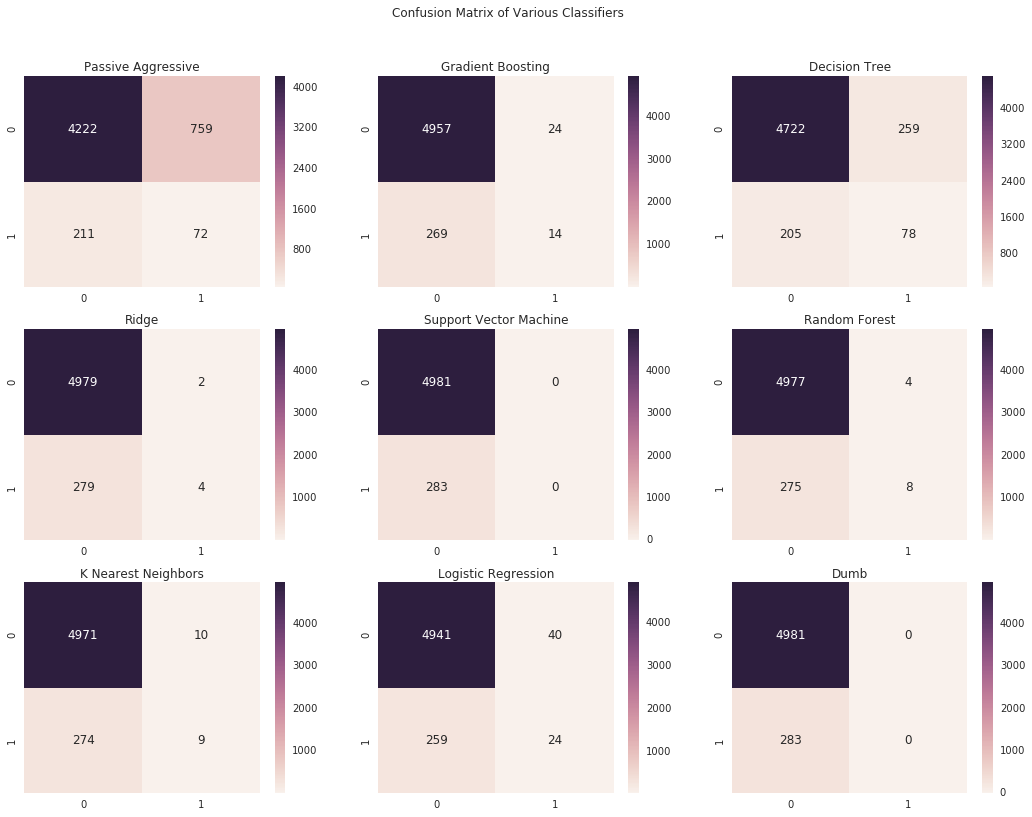

In [176]:
fix, ax = plt.subplots(figsize=(16, 12))
plt.suptitle('Confusion Matrix of Various Classifiers')
for ii, values in conf_matrix.items():
    matrix = values['matrix']
    title = values['title']
    plt.subplot(3, 3, ii) # starts from 1
    plt.title(title);
    sns.heatmap(matrix, annot=True,  fmt='');

In [ ]:
print('Passive Aggressive Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, linear_model.PassiveAggressiveClassifier))))
print('Gradient Boosting Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))))
print('Support vector machine(SVM):\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, svm.SVC))))
print('Random Forest Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, ensemble.RandomForestClassifier))))
print('K Nearest Neighbor Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, neighbors.KNeighborsClassifier))))
print('Logistic Regression:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, linear_model.LogisticRegression))))
print('Dump Classifier:\n {}\n'.format(metrics.classification_report(y, [0 for ii in y.tolist()]))); # ignore the warning as they are all 0



IndexError: index 635 is out of bounds for axis 1 with size 289

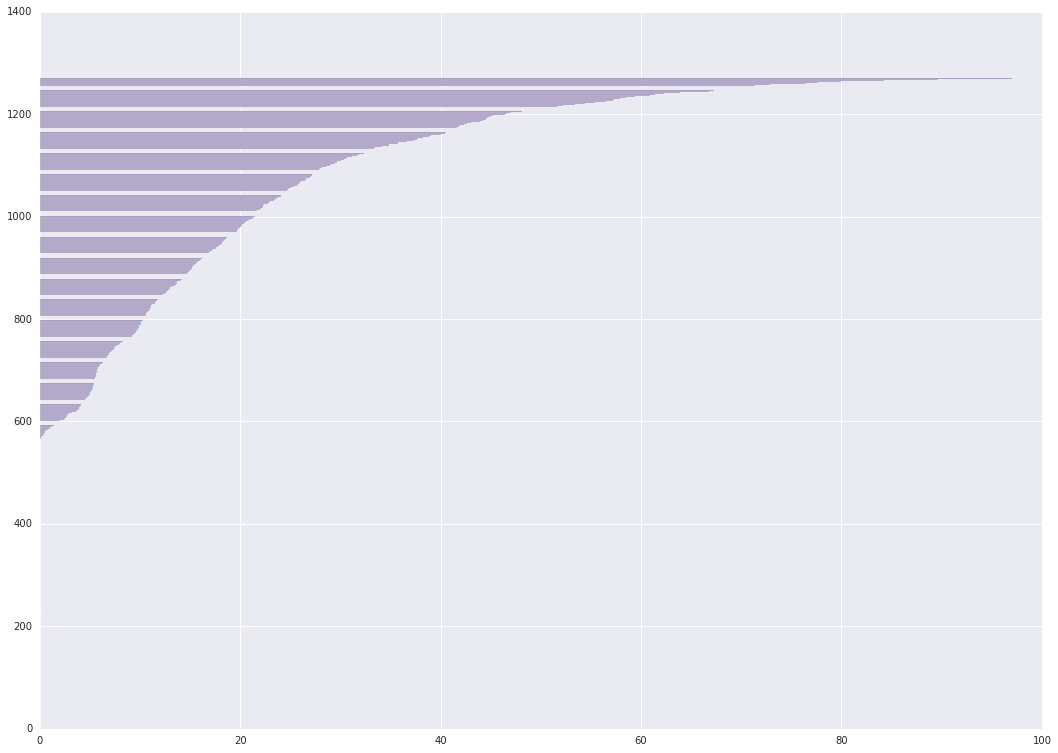

In [190]:
rfc = ensemble.RandomForestClassifier()
rfc.fit(X, y)

# Get Feature Importance from the classifier
feature_importance = rfc.feature_importances_
# Normalize The Features
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(16, 12))
plt.barh(pos, feature_importance[sorted_idx], align='center', color='#7A68A6')
plt.yticks(pos, np.asanyarray(df.columns.tolist())[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()


IndexError: index 635 is out of bounds for axis 1 with size 289

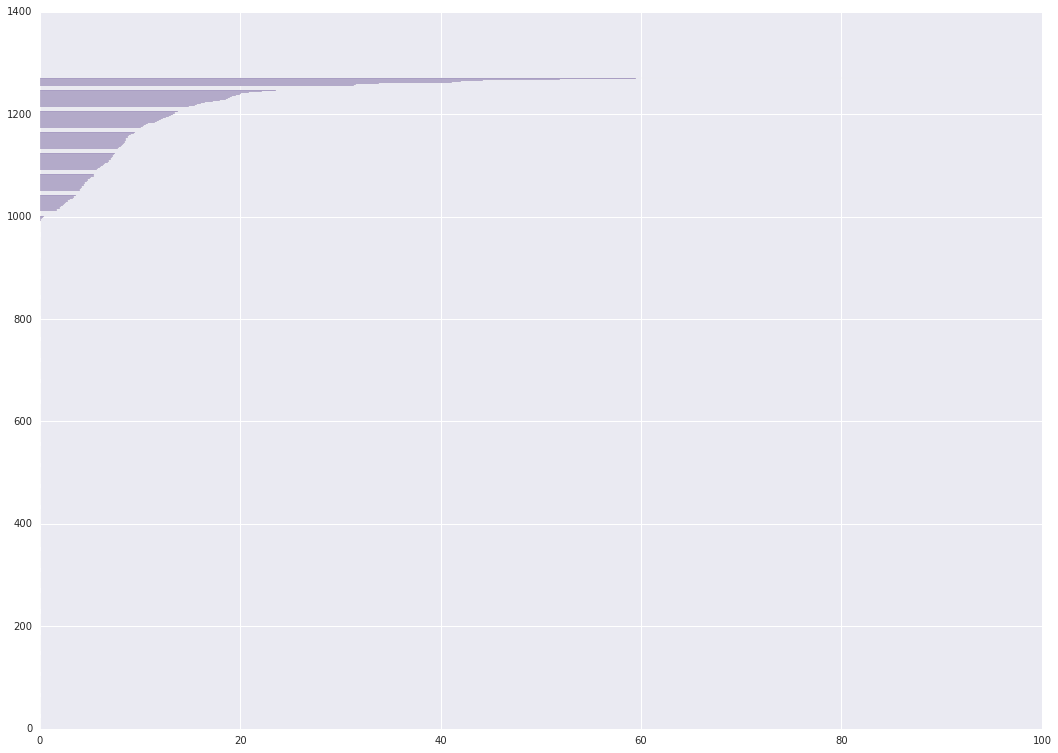

In [188]:
gbc = ensemble.GradientBoostingClassifier()
gbc.fit(X, y)

# Get Feature Importance from the classifier
feature_importance = gbc.feature_importances_
# Normalize The Features
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(16, 12))
plt.barh(pos, feature_importance[sorted_idx], align='center', color='#7A68A6')
plt.yticks(pos, np.asanyarray(df.columns.tolist())[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [191]:
%%time
import scipy
from scipy.stats import pearsonr

# Visual Features and Fear classification
visual_feat_earlyfusion = ['acc', 'cedd', 'cl', 'eh', 'fcth', 'gabor', 'jcd', 'lbp', 'sc', 'tamura'   ]
X,y = getAllVisFusionFearDf(visual_feat_earlyfusion)

X = getNormalized(X)
y = y.as_matrix().astype(np.int)
y_pred= stratified_cv(X, y, linear_model.LogisticRegression)
stratified_cv(X, y, linear_model.LogisticRegression)
print('Logistic Regression AVP:           {:.2f}'.format(metrics.average_precision_score(y,y_pred , average='macro')))
print('Logistic Accuracy:           {:.2f}'.format(metrics.accuracy_score(y, y_pred)))



Logistic Regression AVP:           0.25
Logistic Accuracy:           0.95
CPU times: user 1min 13s, sys: 1.32 s, total: 1min 15s
Wall time: 1min 11s


IndexError: index 635 is out of bounds for axis 1 with size 289

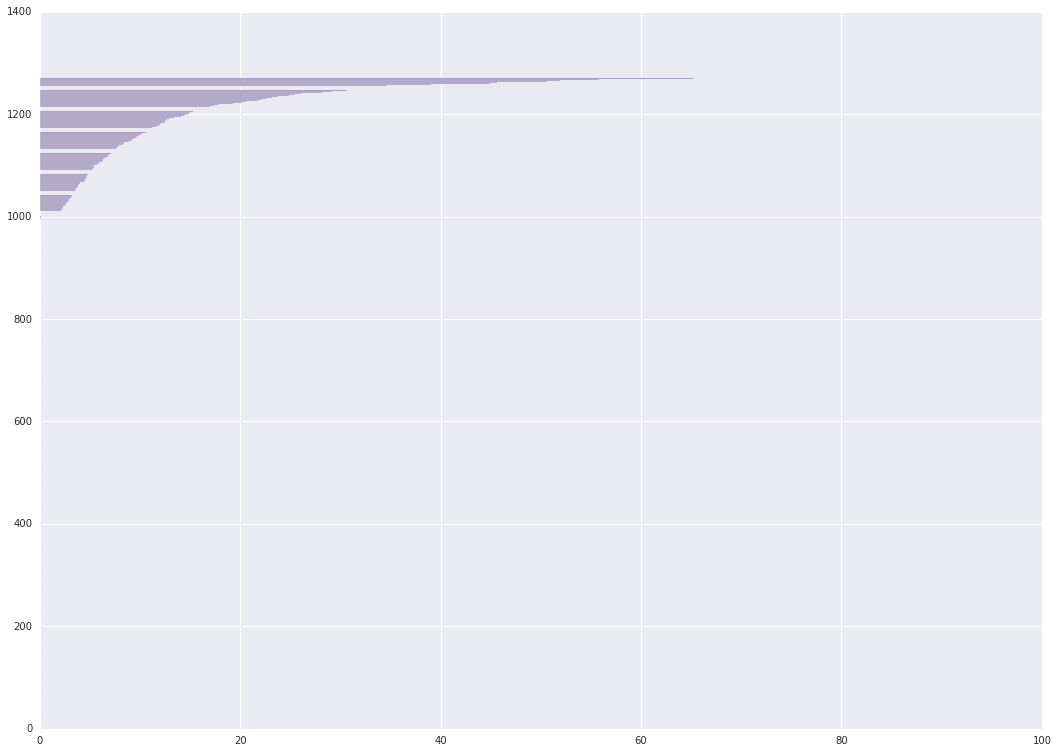

In [192]:
gbc = ensemble.GradientBoostingRegressor()
gbc.fit(X, y)

# Get Feature Importance from the classifier
feature_importance = gbc.feature_importances_
# Normalize The Features
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(16, 12))
plt.barh(pos, feature_importance[sorted_idx], align='center', color='#7A68A6')
plt.yticks(pos, np.asanyarray(df.columns.tolist())[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [187]:
import scipy
from scipy.stats import pearsonr

print pearsonr(y,y_pred)

(0.17571970175222498, 8.0986372523306002e-38)


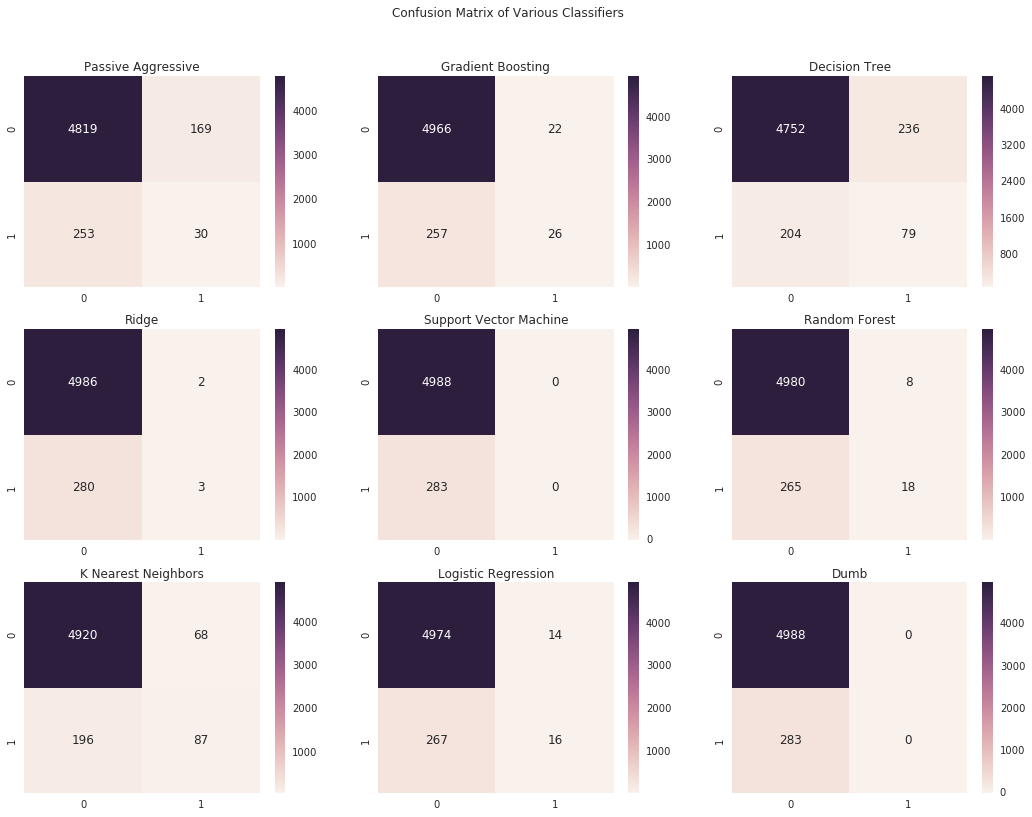

In [179]:
displayclassifiercomparison(X,y)

In [178]:
def displayclassifiercomparison(X,y):
    pass_agg_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, linear_model.PassiveAggressiveClassifier))
    grad_ens_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))
    decision_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, tree.DecisionTreeClassifier))
    ridge_clf_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, linear_model.RidgeClassifier))
    svm_svc_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, svm.SVC))
    random_forest_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, ensemble.RandomForestClassifier))
    k_neighbors_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, neighbors.KNeighborsClassifier))
    logistic_reg_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, linear_model.LogisticRegression))
    dumb_conf_matrix = metrics.confusion_matrix(y, [0 for ii in y.tolist()]); # ignore the warning as they are all 0

    conf_matrix = {
                    1: {
                        'matrix': pass_agg_conf_matrix,
                        'title': 'Passive Aggressive',
                       },
                    2: {
                        'matrix': grad_ens_conf_matrix,
                        'title': 'Gradient Boosting',
                       },
                    3: {
                        'matrix': decision_conf_matrix,
                        'title': 'Decision Tree',
                       },
                    4: {
                        'matrix': ridge_clf_conf_matrix,
                        'title': 'Ridge',
                       },
                    5: {
                        'matrix': svm_svc_conf_matrix,
                        'title': 'Support Vector Machine',
                       },
                    6: {
                        'matrix': random_forest_conf_matrix,
                        'title': 'Random Forest',
                       },
                    7: {
                        'matrix': k_neighbors_conf_matrix,
                        'title': 'K Nearest Neighbors',
                       },
                    8: {
                        'matrix': logistic_reg_conf_matrix,
                        'title': 'Logistic Regression',
                       },
                    9: {
                        'matrix': dumb_conf_matrix,
                        'title': 'Dumb',
                       },
    }
    
    fix, ax = plt.subplots(figsize=(16, 12))
    plt.suptitle('Confusion Matrix of Various Classifiers')
    for ii, values in conf_matrix.items():
        matrix = values['matrix']
        title = values['title']
        plt.subplot(3, 3, ii) # starts from 1
        plt.title(title);
        sns.heatmap(matrix, annot=True,  fmt='');

# Gradient Boosting
Produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.


In [ ]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred = gbc.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

In [ ]:
y_test.head(10)
y_pred[:10]

In [ ]:
# Get Feature Importance from the classifier
feature_importance = gbc.feature_importances_
# Normalize The Features
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(16, 12))
plt.barh(pos, feature_importance[sorted_idx], align='center', color='#7A68A6')
#plt.yticks(pos, np.asanyarray(df.columns.tolist())[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
plt.imshow(np.log(confusion_matrix(y_test, y_pred)),
           cmap='Blues', interpolation='nearest')
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

In [ ]:
%%time

# Audio Features and Arousal classification
X,y =  getAllAudioArousalDf()
X = getNormalized(X)

# split X and y into training and testing sets
#from sklearn.cross_validation import train_test_split
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(n_estimators=200,max_depth=1)
est.fit(X_train,y_train)

y_pred = est.predict(X_test)
#for pred in est.staged_predict(X):
#    plt.plot(X[:,0], pred, color='r',alpha=0.1)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(y_test, y_pred))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


from scipy.stats import pearsonr
pearsonr(y_test,y_pred)

## GradientBoostingRegressor pipeline

In [ ]:
# split X and y into training and testing sets
#from sklearn.cross_validation import train_test_split
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)



from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pipe = make_pipeline(StandardScaler(), PCA(n_components=200), StandardScaler(),GradientBoostingRegressor(n_estimators=2000,max_depth=1))
print("Pipeline steps:\n{}".format(pipe.steps))
pipe.fit(X_train, y_train)
components = pipe.named_steps["pca"].components_
print("components.shape: {}".format(components.shape))
print("Test score: {:.2f}".format(pipe.score(X_test, y_test)))

y_pred = pipe.predict(X_test)
#for pred in est.staged_predict(X):
#    plt.plot(X[:,0], pred, color='r',alpha=0.1)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(y_test, y_pred))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


from scipy.stats import pearsonr
pearsonr(y_test,y_pred)

## SVM pipeline

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVR(kernel='rbf'))])
pipe.fit(X_train, y_train)
print("Test score: {:.2f}".format(pipe.score(X_test, y_test)))

## Model Selection

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

pipe = make_pipeline(StandardScaler(), PolynomialFeatures())

param_grid = [ 
    {'regressor': [SVR(kernel='rbf')], 'preprocessing': [MinMaxScaler()],
     'regressor__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
     'regressor__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'regressor': [RandomForestRegressor(n_estimators=100)],
     'preprocessing': [None], 'regressor__max_features': [1, 2, 3]},
    {'regressor': [GradientBoostingRegressor(max_depth=50)],
     'preprocessing': [None], 'regressor__n_estimators': [10, 50, 100]}]

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

In [196]:
28. / 708

0.03954802259887006

In [ ]:
from IPython.display import Image
from IPython.core.display import HTML 
PATH = "/home/yt/datascience/"
Image(filename = PATH + "The-circumplex.ppm.png", width=500, height=500)
#http://stackoverflow.com/questions/32370281/how-to-include-image-or-picture-in-jupyter-notebook
#Image(url= "https://www.researchgate.net/profile/Philippe_Zimmermann/publication/285895436/figure/fig1/AS:341962390556673@1458541595472/Figure-1-Two-dimensional-affective-space-defined-by-valence-and-arousal-The-circumplex.ppm")

In [ ]:
for moviename in movieNames:
    displayAV(moviename,getAnnotationDf(moviename,med2017annotationsFolder),getFearDf(moviename,med2017fearFolder))